In [277]:
!pip install numpy==1.26.2

In [278]:
!pip install shap==0.42.1

In [279]:
!pip install adjustText

In [280]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import shap
import sys
from sklearn.neural_network import MLPClassifier

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
print(np.__version__)
print(shap.__version__)
print(sys.version)

1.26.2
0.42.1
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


<h1>Data Understanding</h1>

In [5]:
data=pd.read_csv('C:/Users/User/Downloads/Breast Cancer Detection/data.csv')
coimbra=pd.read_csv('C:/Users/User/Downloads/Coimbra_breast_cancer_dataset.csv')

In [6]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [7]:
coimbra.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [8]:
data.shape

(569, 33)

In [9]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [12]:
data.duplicated().sum()

0

In [13]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [14]:
data.select_dtypes(include=['object', 'string'])


diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]

In [15]:
data['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [16]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [17]:
data1=data.copy()

In [18]:
data1['diagnosis'] = data1['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)


In [19]:
corr=data1.corr()

In [20]:
data1["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<h2>Visualiser la coorelation des features entre eux</h2>

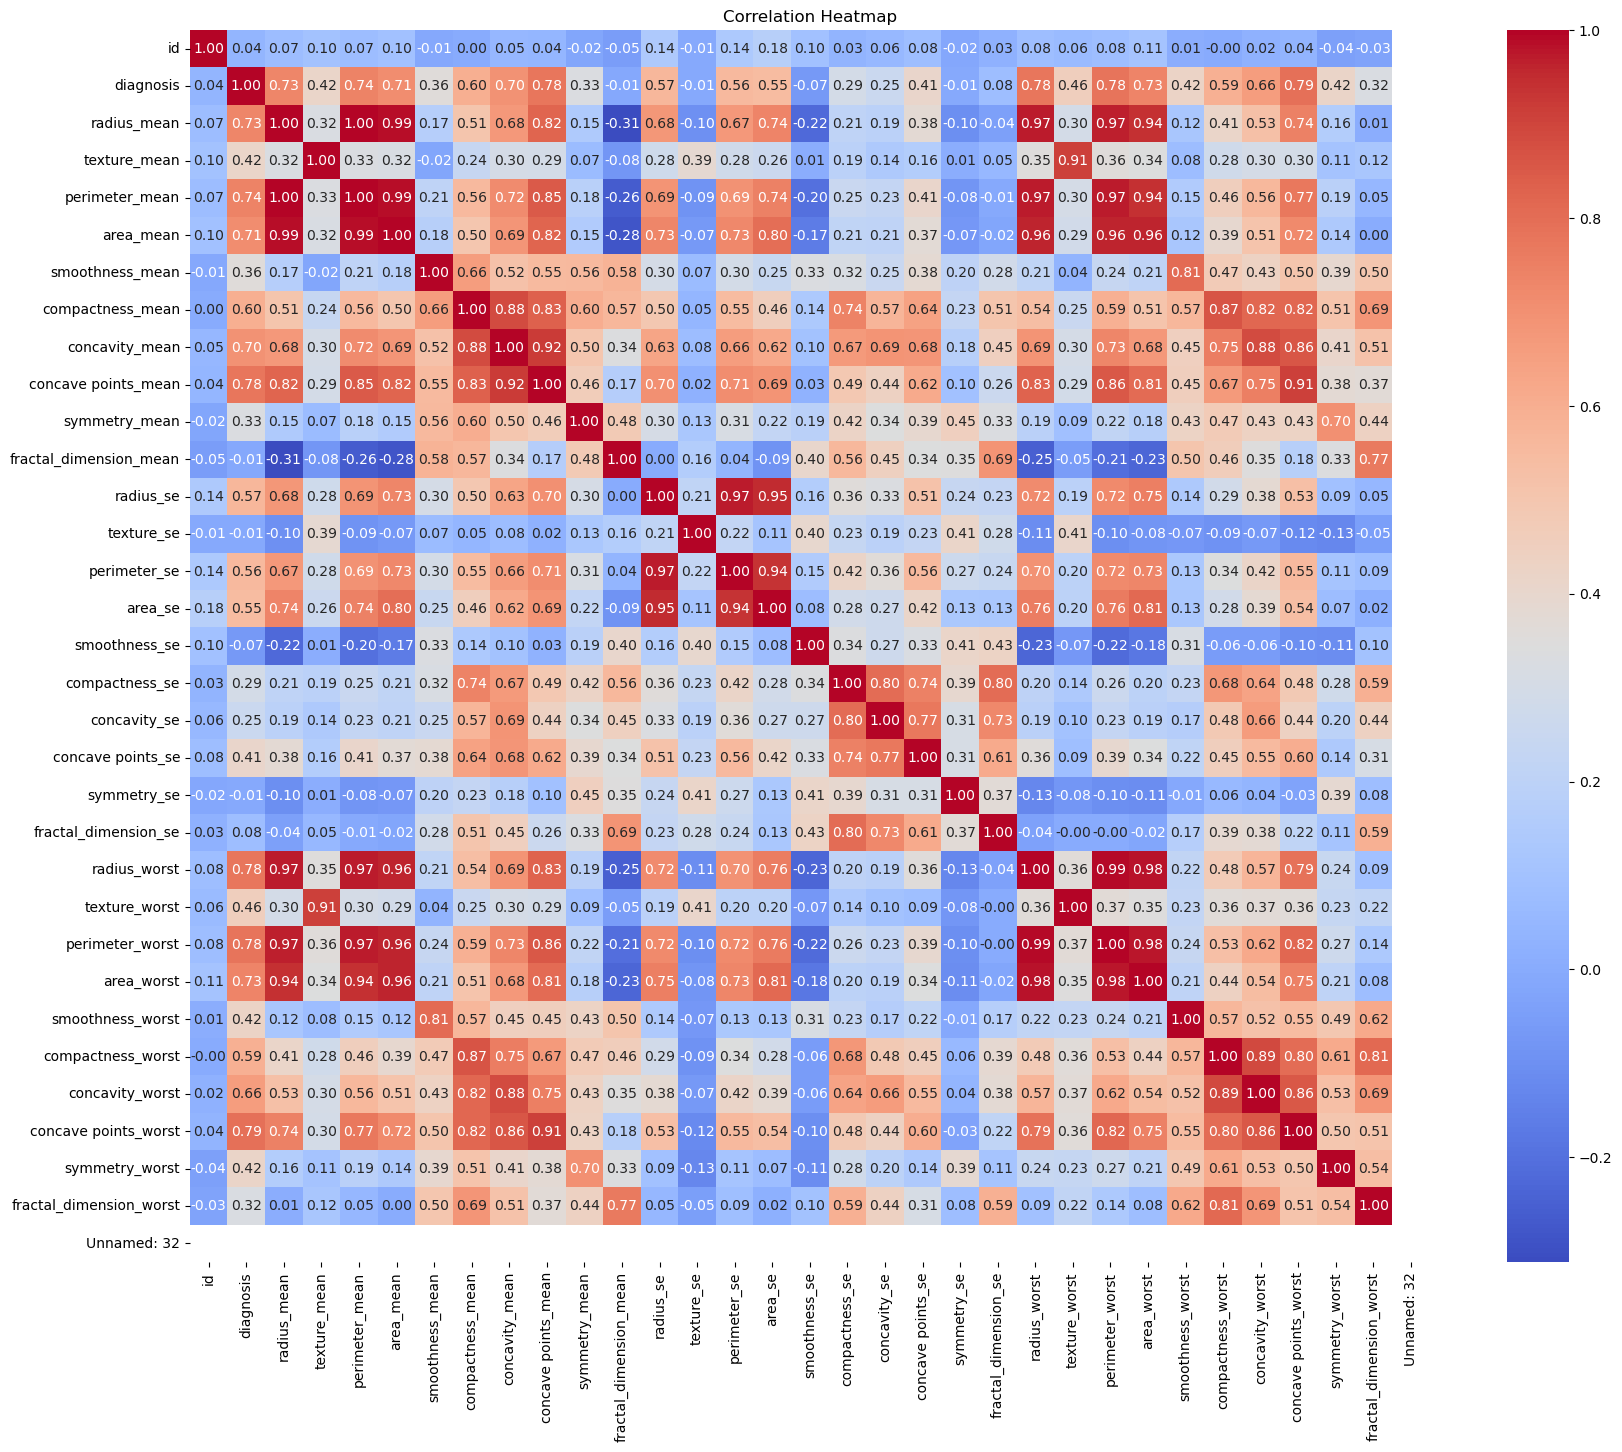

In [22]:
plt.figure(figsize=(20, 16))   # set the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [23]:
list=data.drop(columns='diagnosis').columns

<h2>Visualizer la distribution des donnees dataset1</h2>

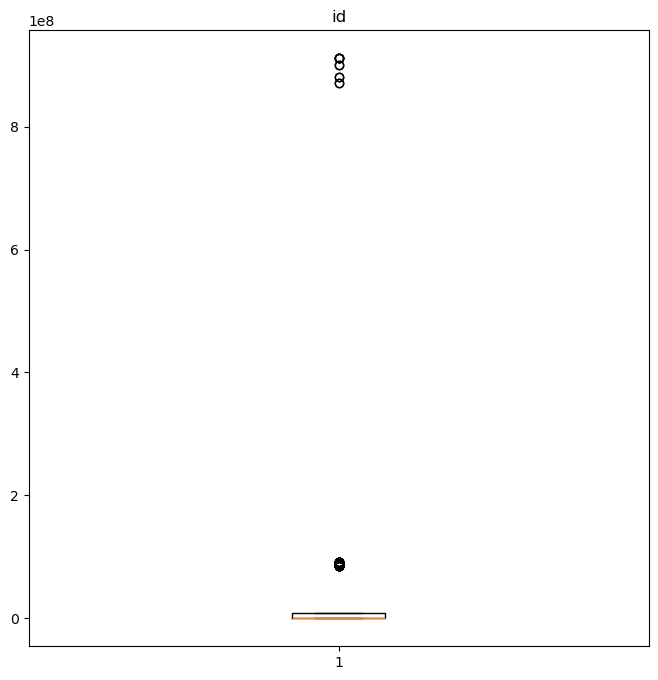

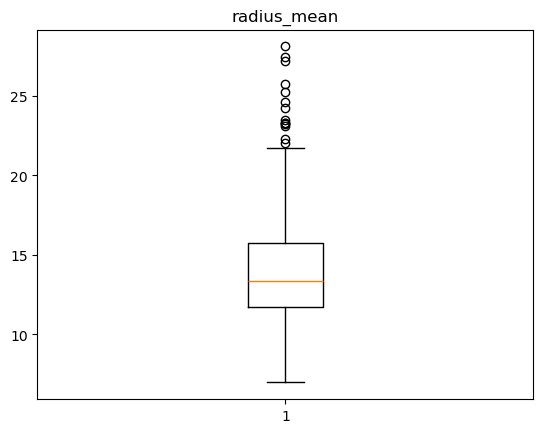

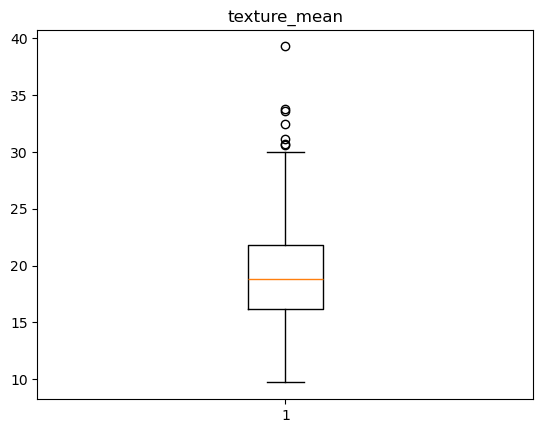

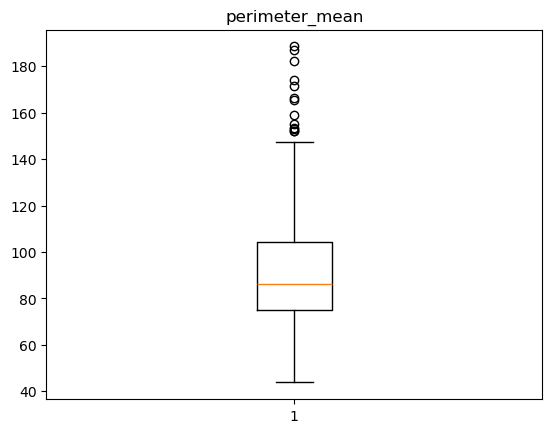

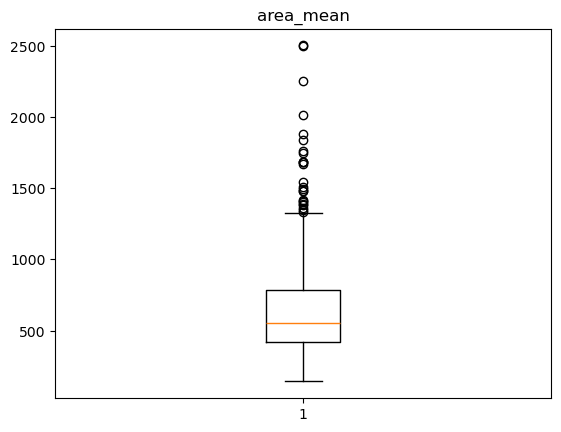

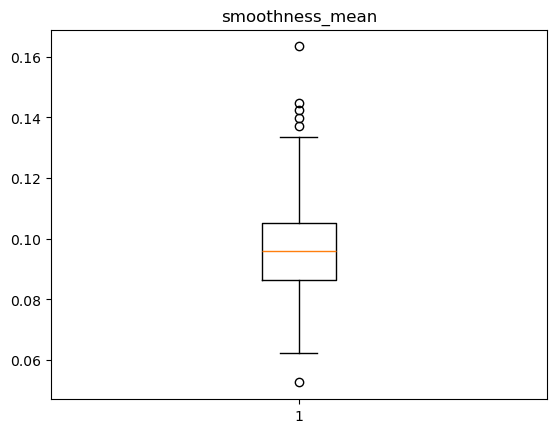

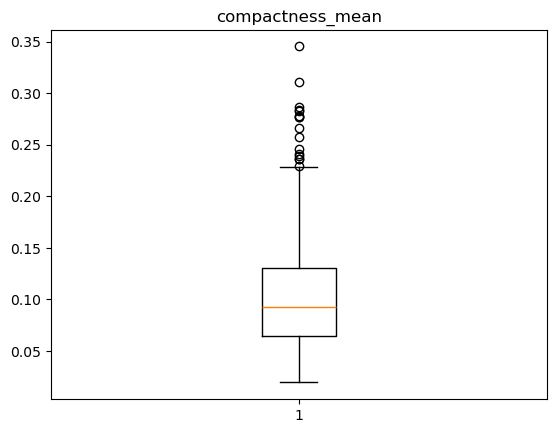

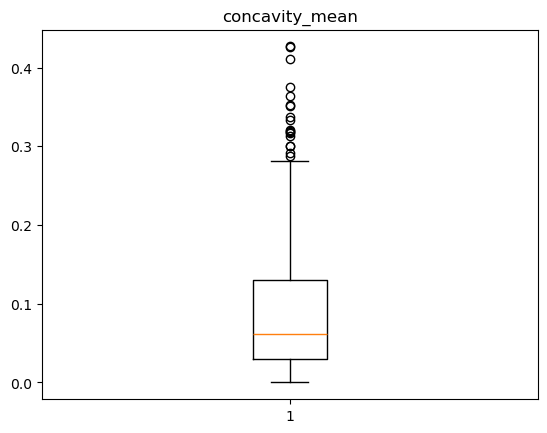

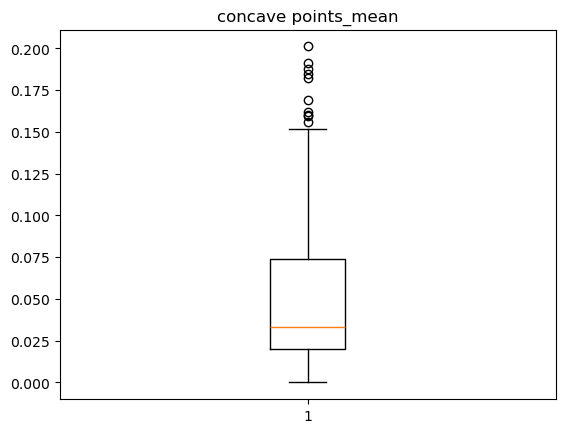

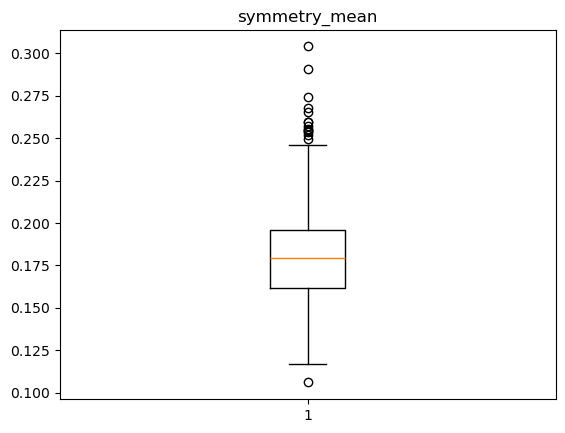

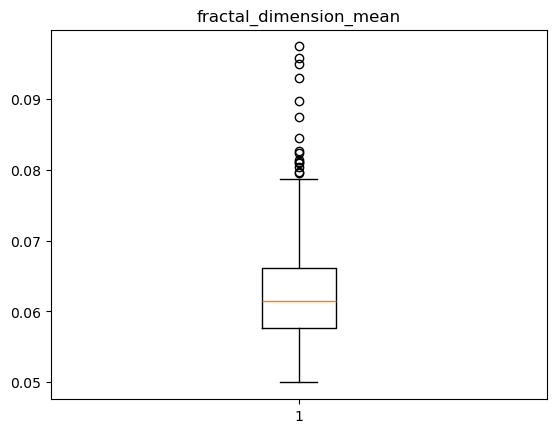

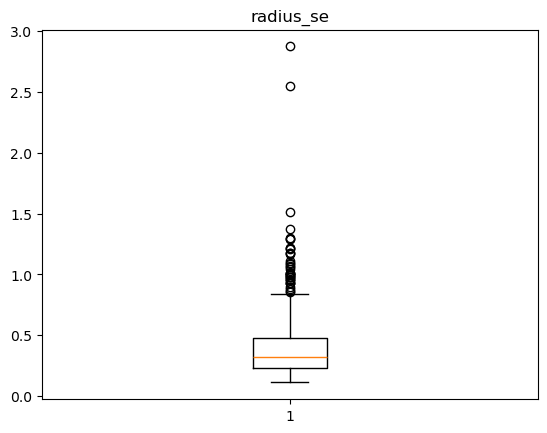

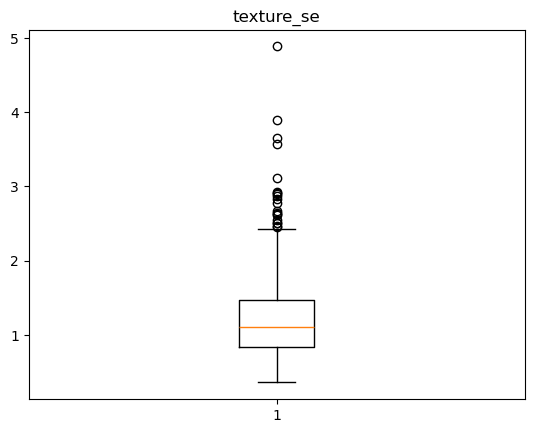

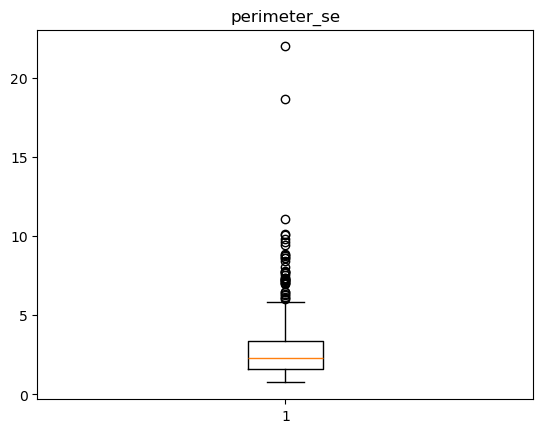

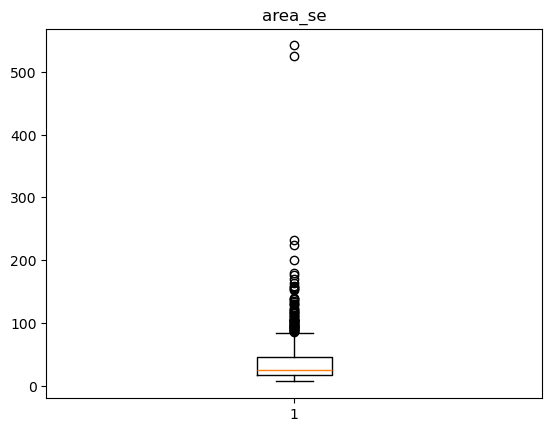

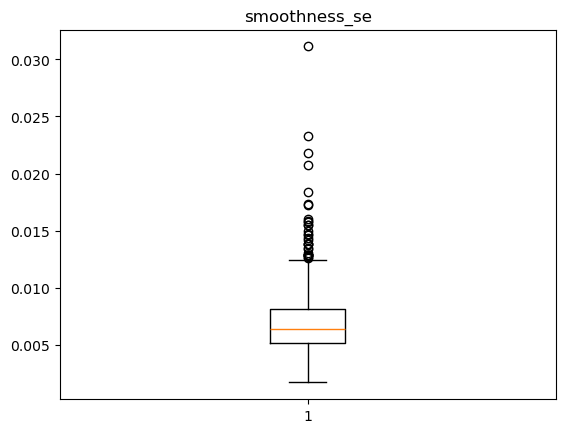

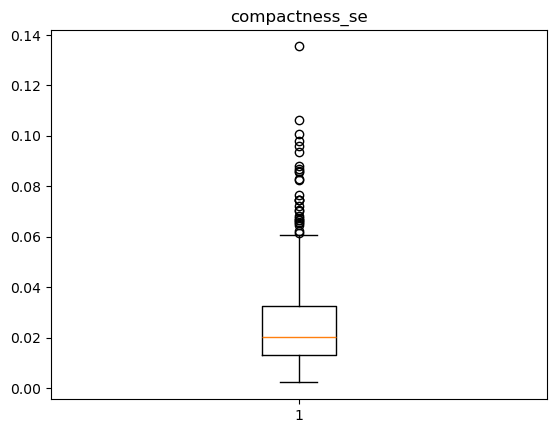

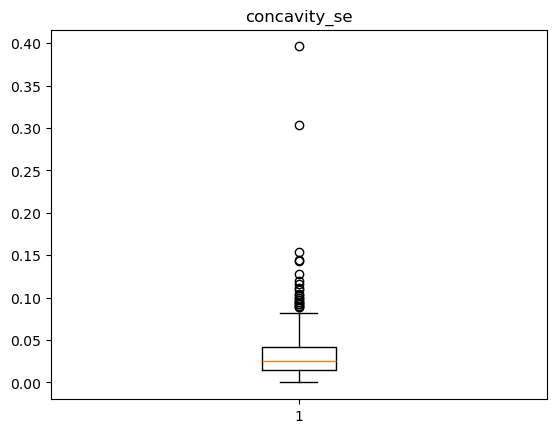

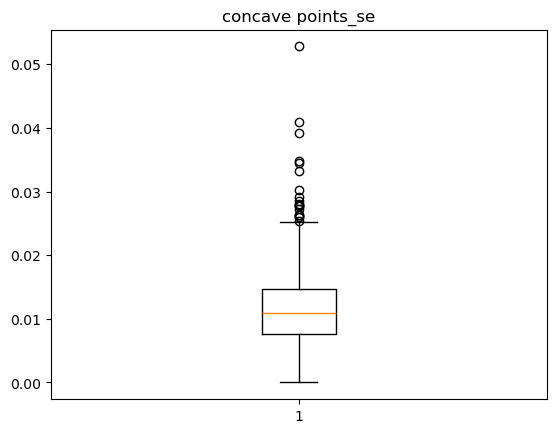

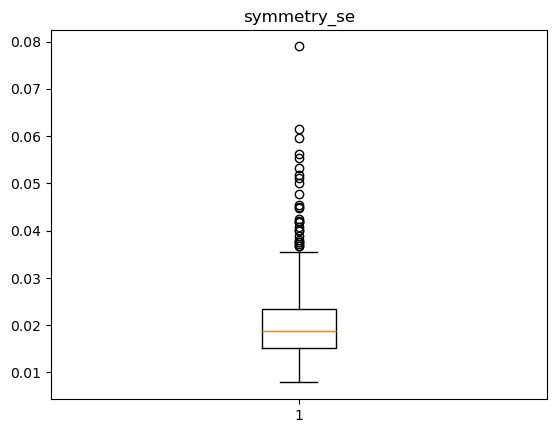

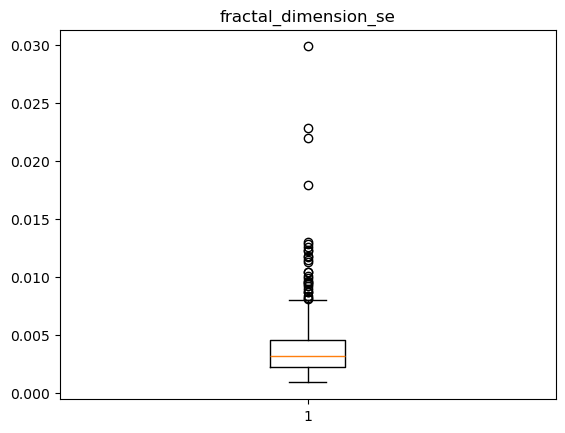

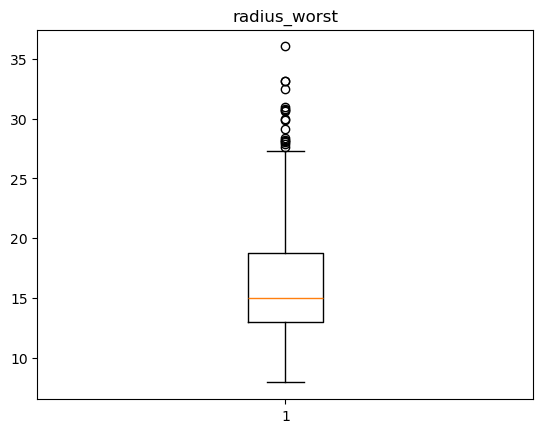

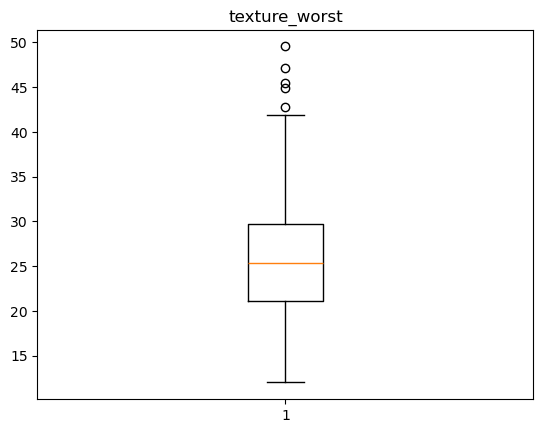

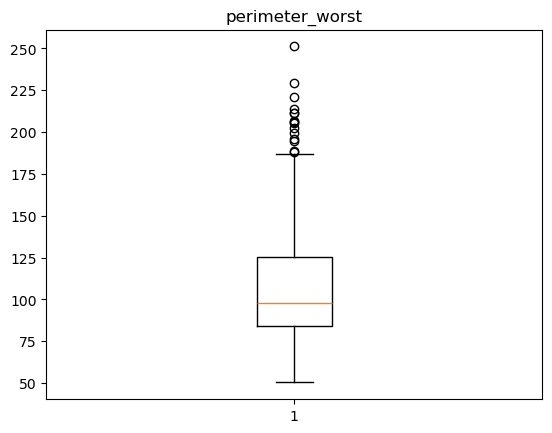

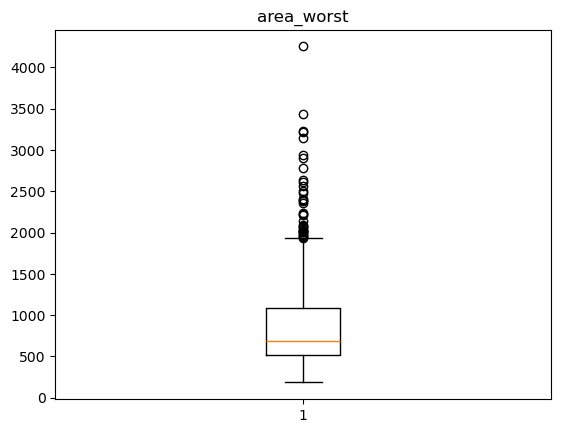

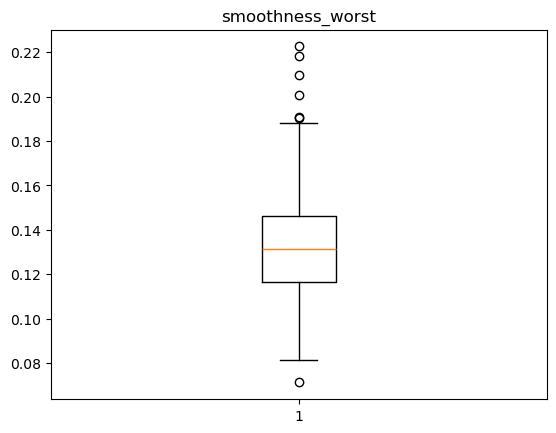

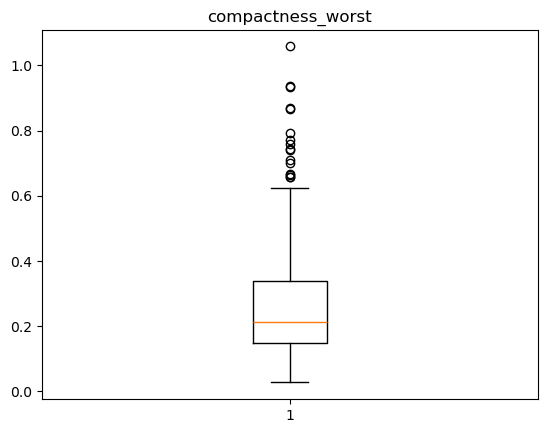

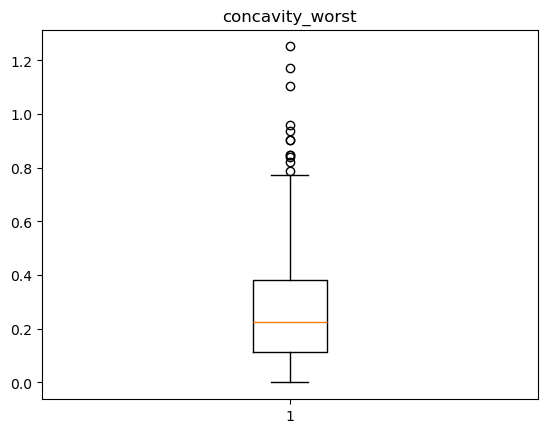

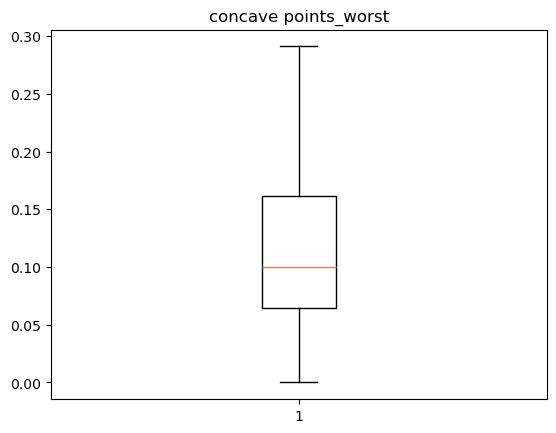

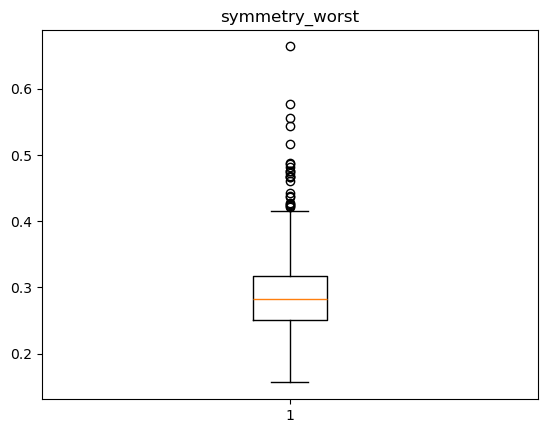

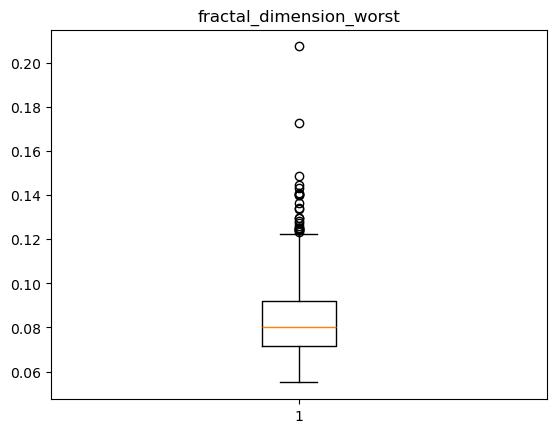

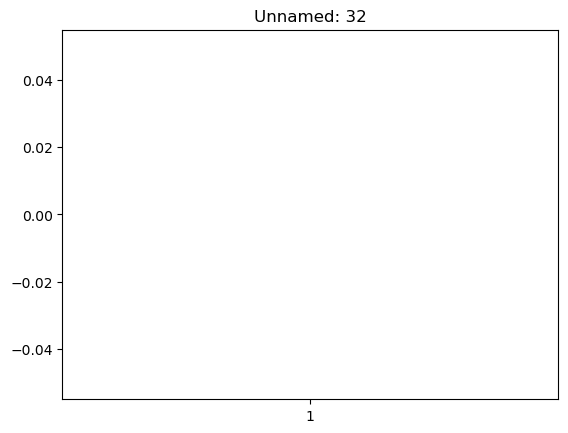

In [25]:
figure=plt.figure(figsize=(8,8))
for c in list:
    plt.boxplot(data[c])
    plt.title(c)
    plt.show()

In [26]:
#"sns.pairplot(
 #   data,
  #  hue='diagnosis'
#)#
#plt.show()""

In [27]:
coimbra.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [28]:
coimbra.tail()

Age    BMI  Glucose  Insulin      HOMA  Leptin  Adiponectin  Resistin  \
111   45  26.85       92     3.33  0.755688   54.68        12.10     10.96   
112   62  26.84      100     4.53  1.117400   12.45        21.42      7.32   
113   65  32.05       97     5.73  1.370998   61.48        22.54     10.33   
114   72  25.59       82     2.82  0.570392   24.96        33.75      3.27   
115   86  27.18      138    19.91  6.777364   90.28        14.11      4.35   

      MCP.1  Classification  
111  268.23               2  
112  330.16               2  
113  314.05               2  
114  392.46               2  
115   90.09               2

In [29]:
coimbra.shape

(116, 10)

In [30]:
coimbra.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [31]:
coimbra.duplicated().sum()

0

In [32]:
coimbra.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [33]:
coimbra.describe()

Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    3.210000    45.843000        1.000000  
25%       5.474283    6.881763   269.978250        1.000000  
50%       8.352692   10.827740   471.322500        2.000000  
75%      11.815970   17.755207   700.085000        2.000000  
max      38.040000   82.100000  1698.440000        2.000000

In [34]:
coimbra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [35]:
coimbra['Classification'].value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

<h2>Visualizer la distribution des donnees dataset2</h2>

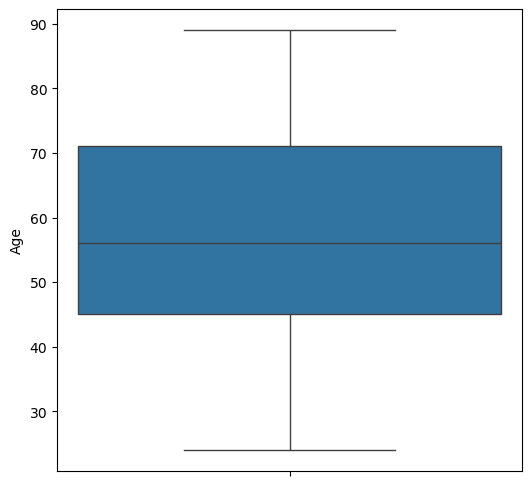

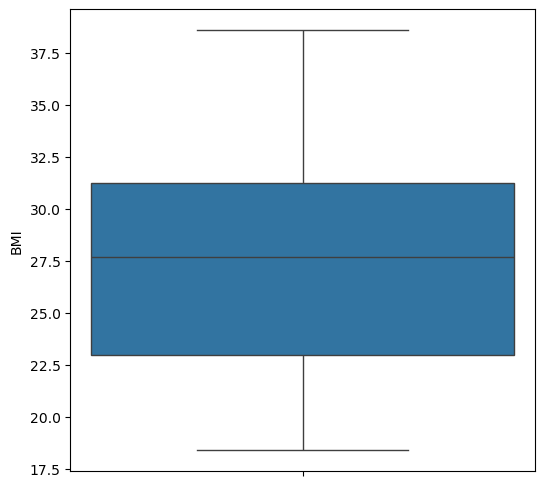

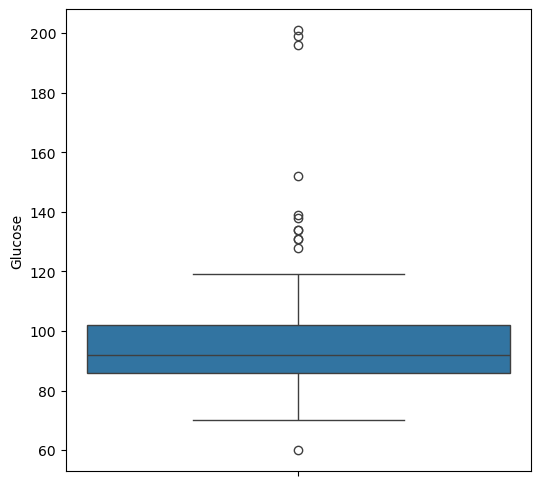

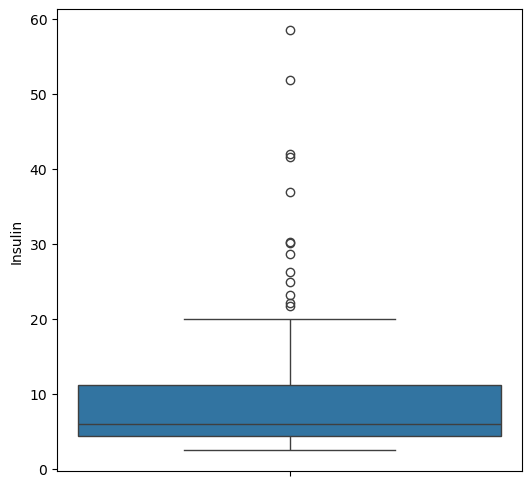

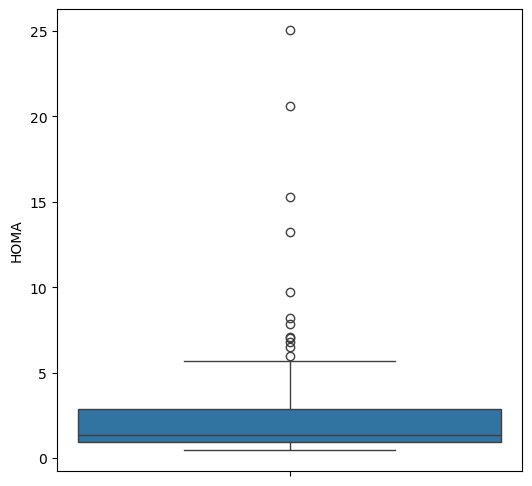

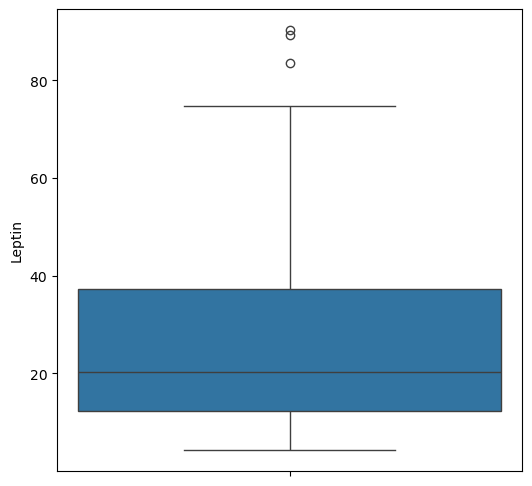

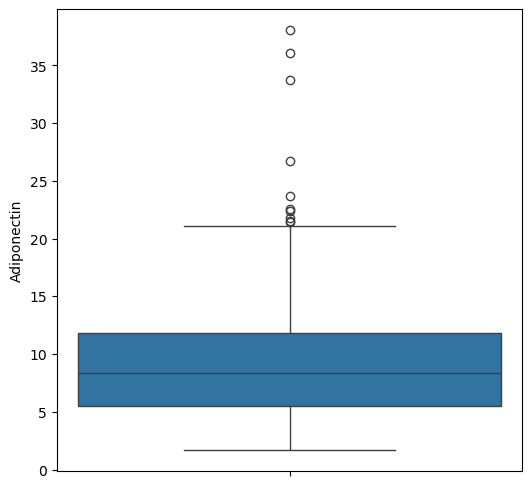

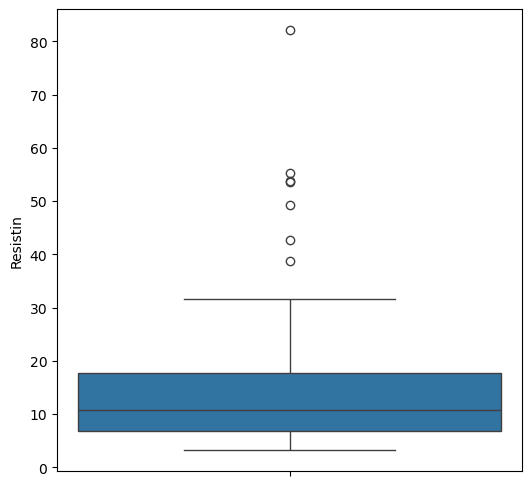

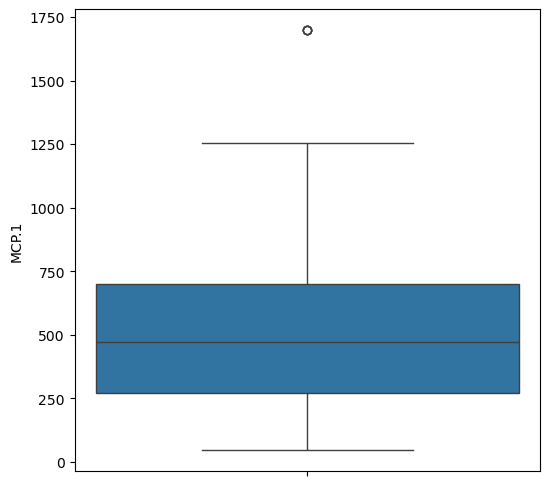

In [37]:
numeric_cols = coimbra.select_dtypes(include=['int64', 'float64']).columns
for c in numeric_cols[:-1]:
    plt.figure(figsize=(6,6))
    sns.boxplot(coimbra[c])
    plt.plot()
    plt.show()

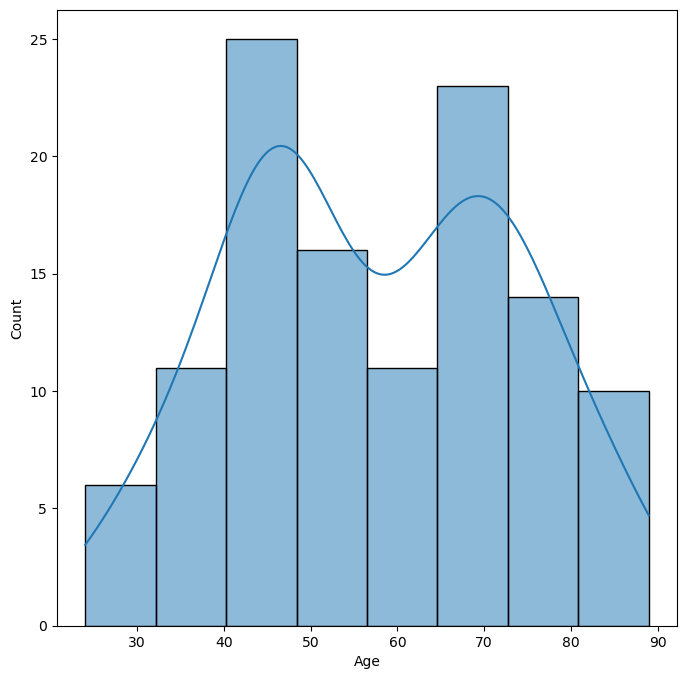

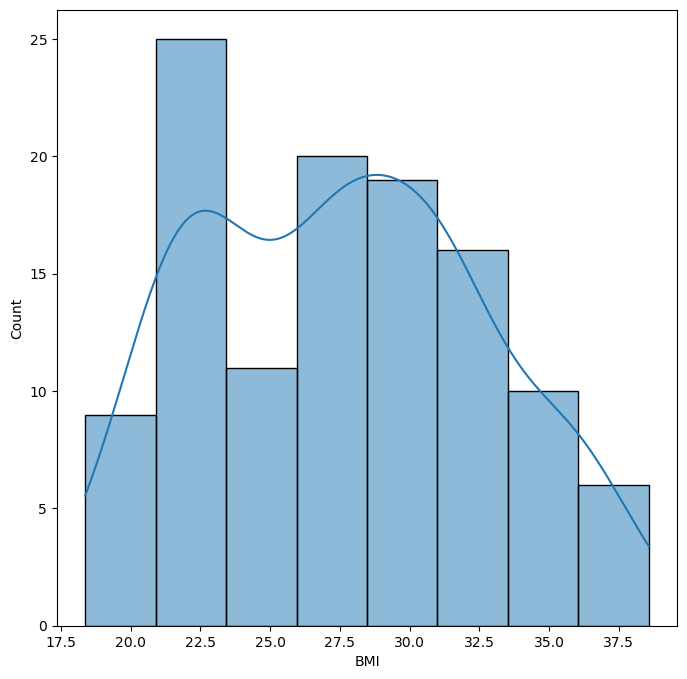

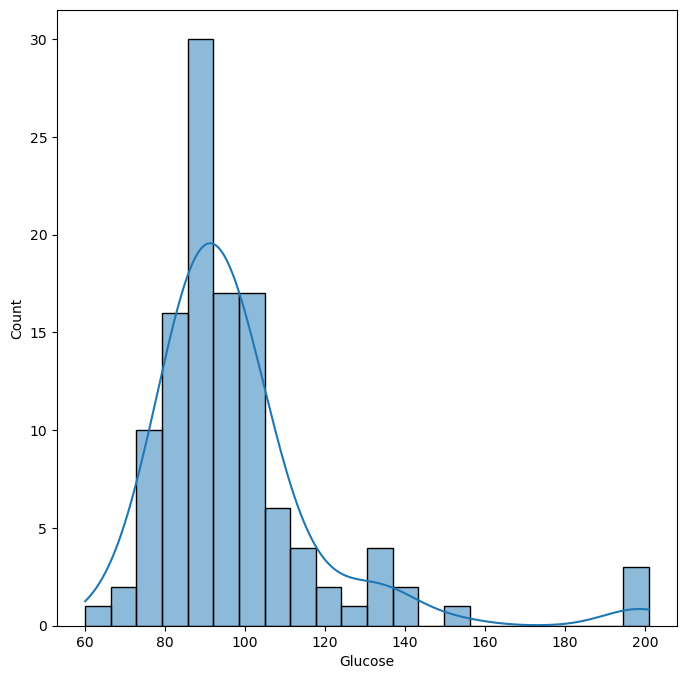

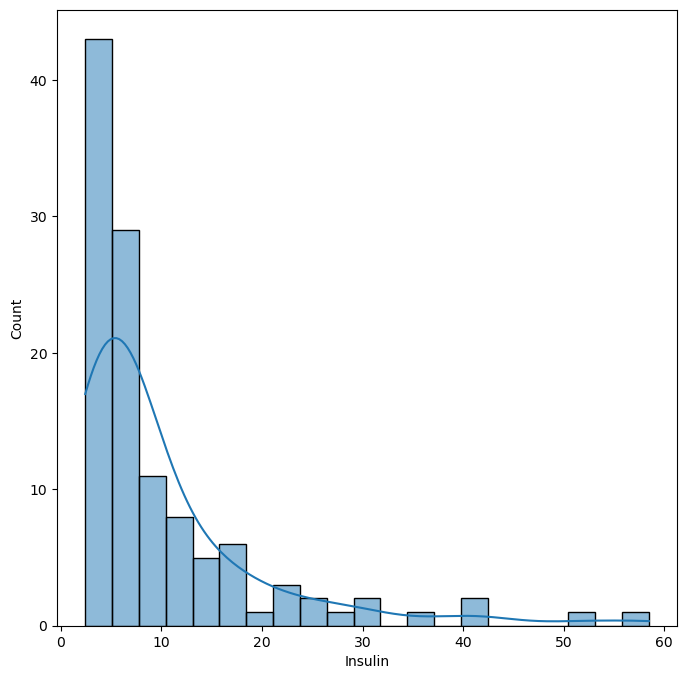

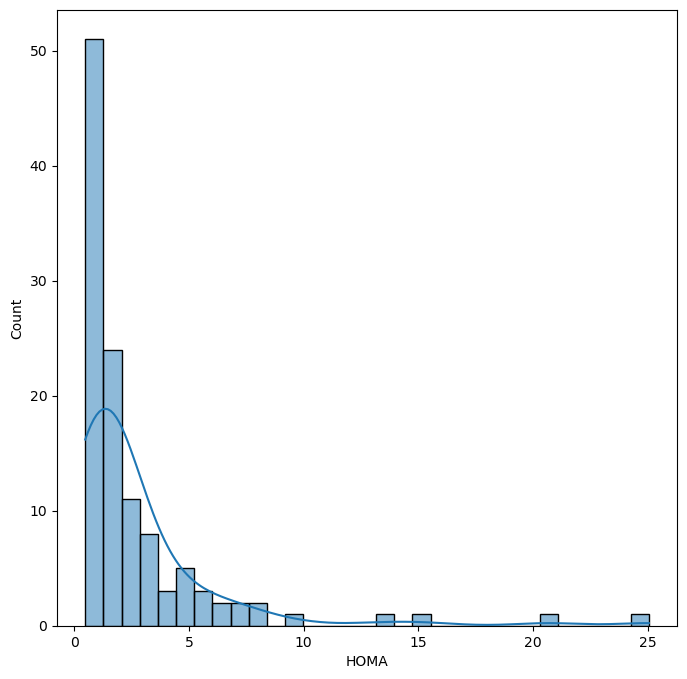

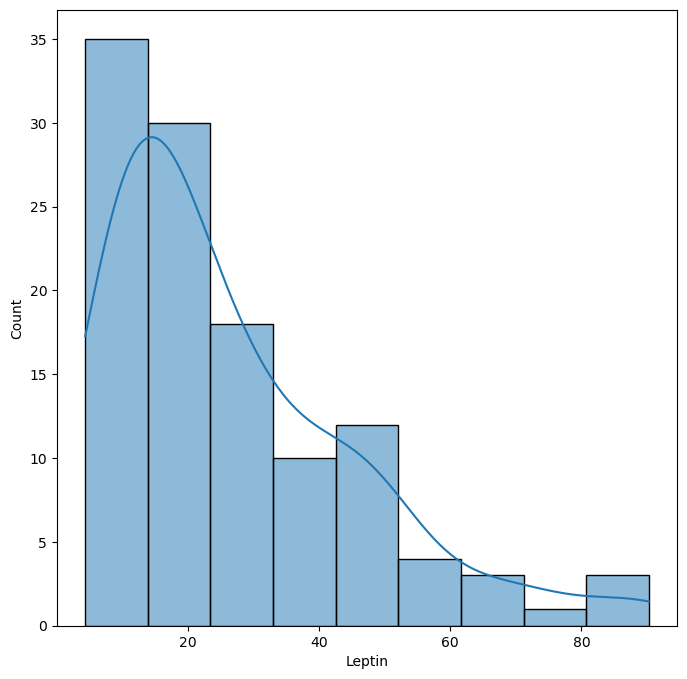

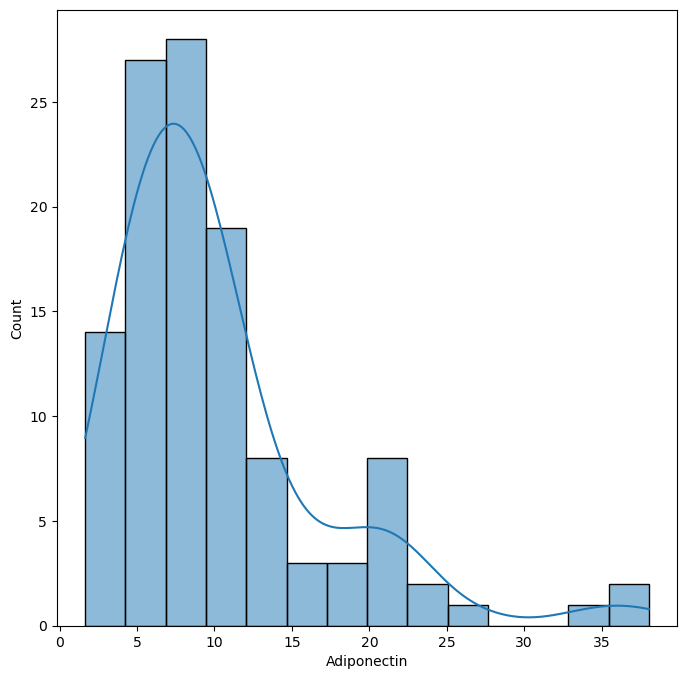

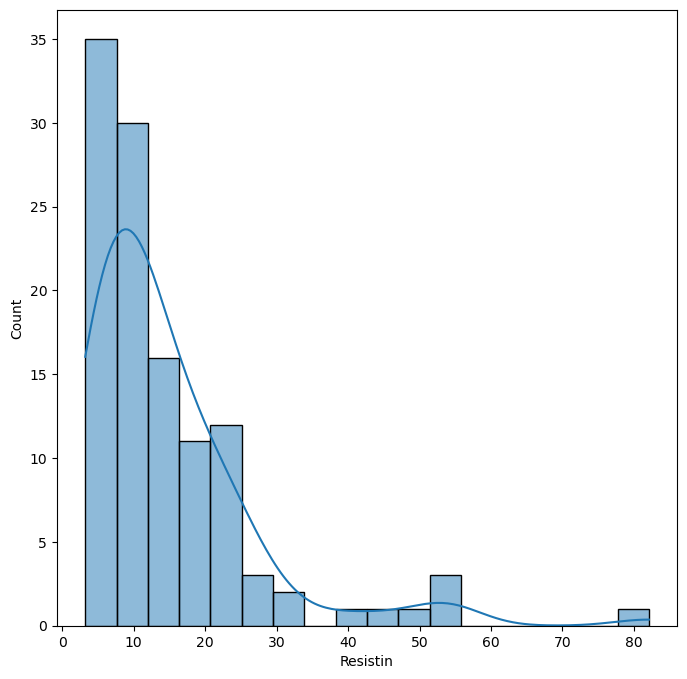

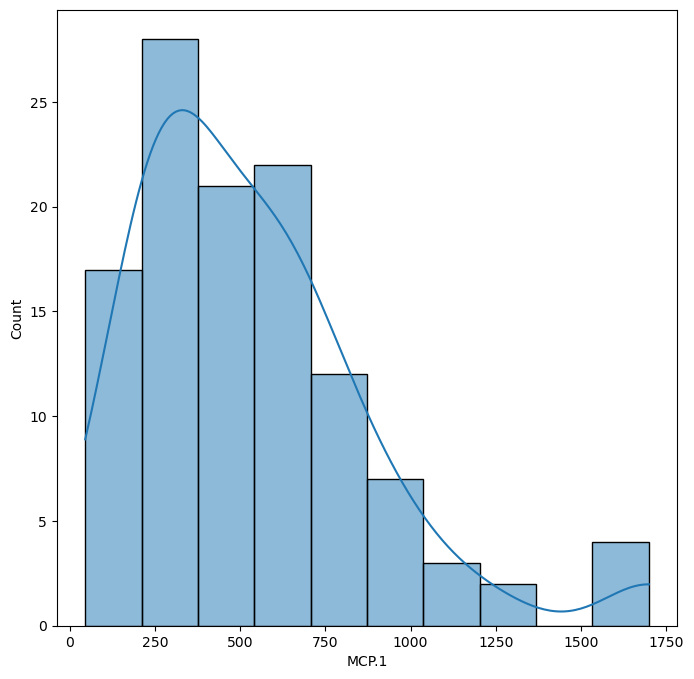

In [38]:
for c in numeric_cols[:-1]:
    plt.figure(figsize=(8,8))
    sns.histplot(data=coimbra,x=c,kde=True)
    plt.plot()
    plt.show()
    

<Axes: >

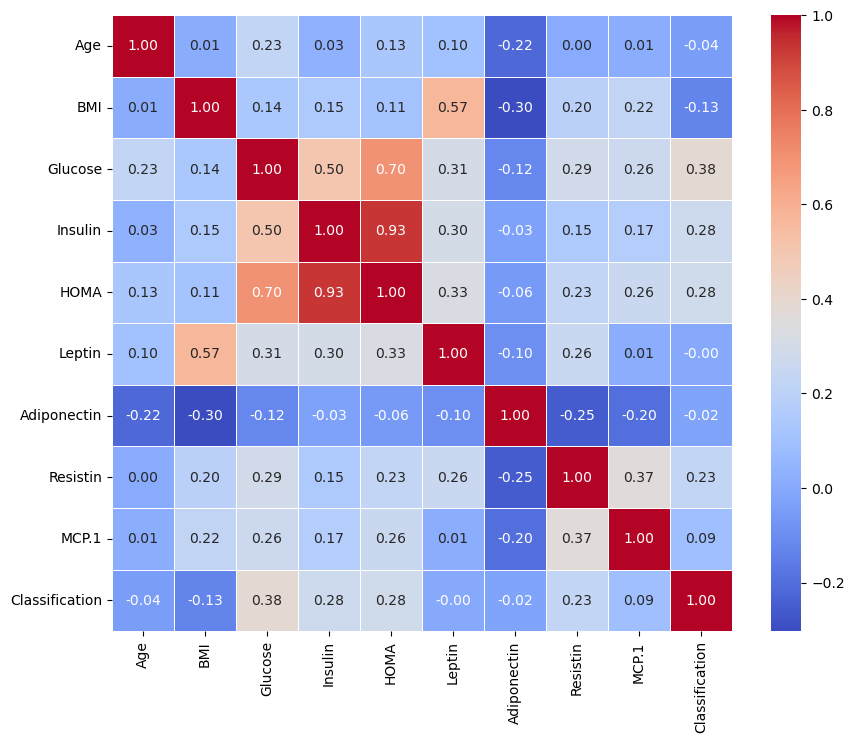

In [39]:
heat=coimbra.corr()
plt.figure(figsize=(10, 8))

# 4. Create the Heatmap
sns.heatmap(
    heat, 
    annot=True,       # Show the numbers inside the squares
    cmap='coolwarm',  # Color scheme (Red=High positive, Blue=High negative)
    fmt=".2f",        # Format numbers to 2 decimal places
    linewidths=0.5    # Small gaps between squares for readability
)

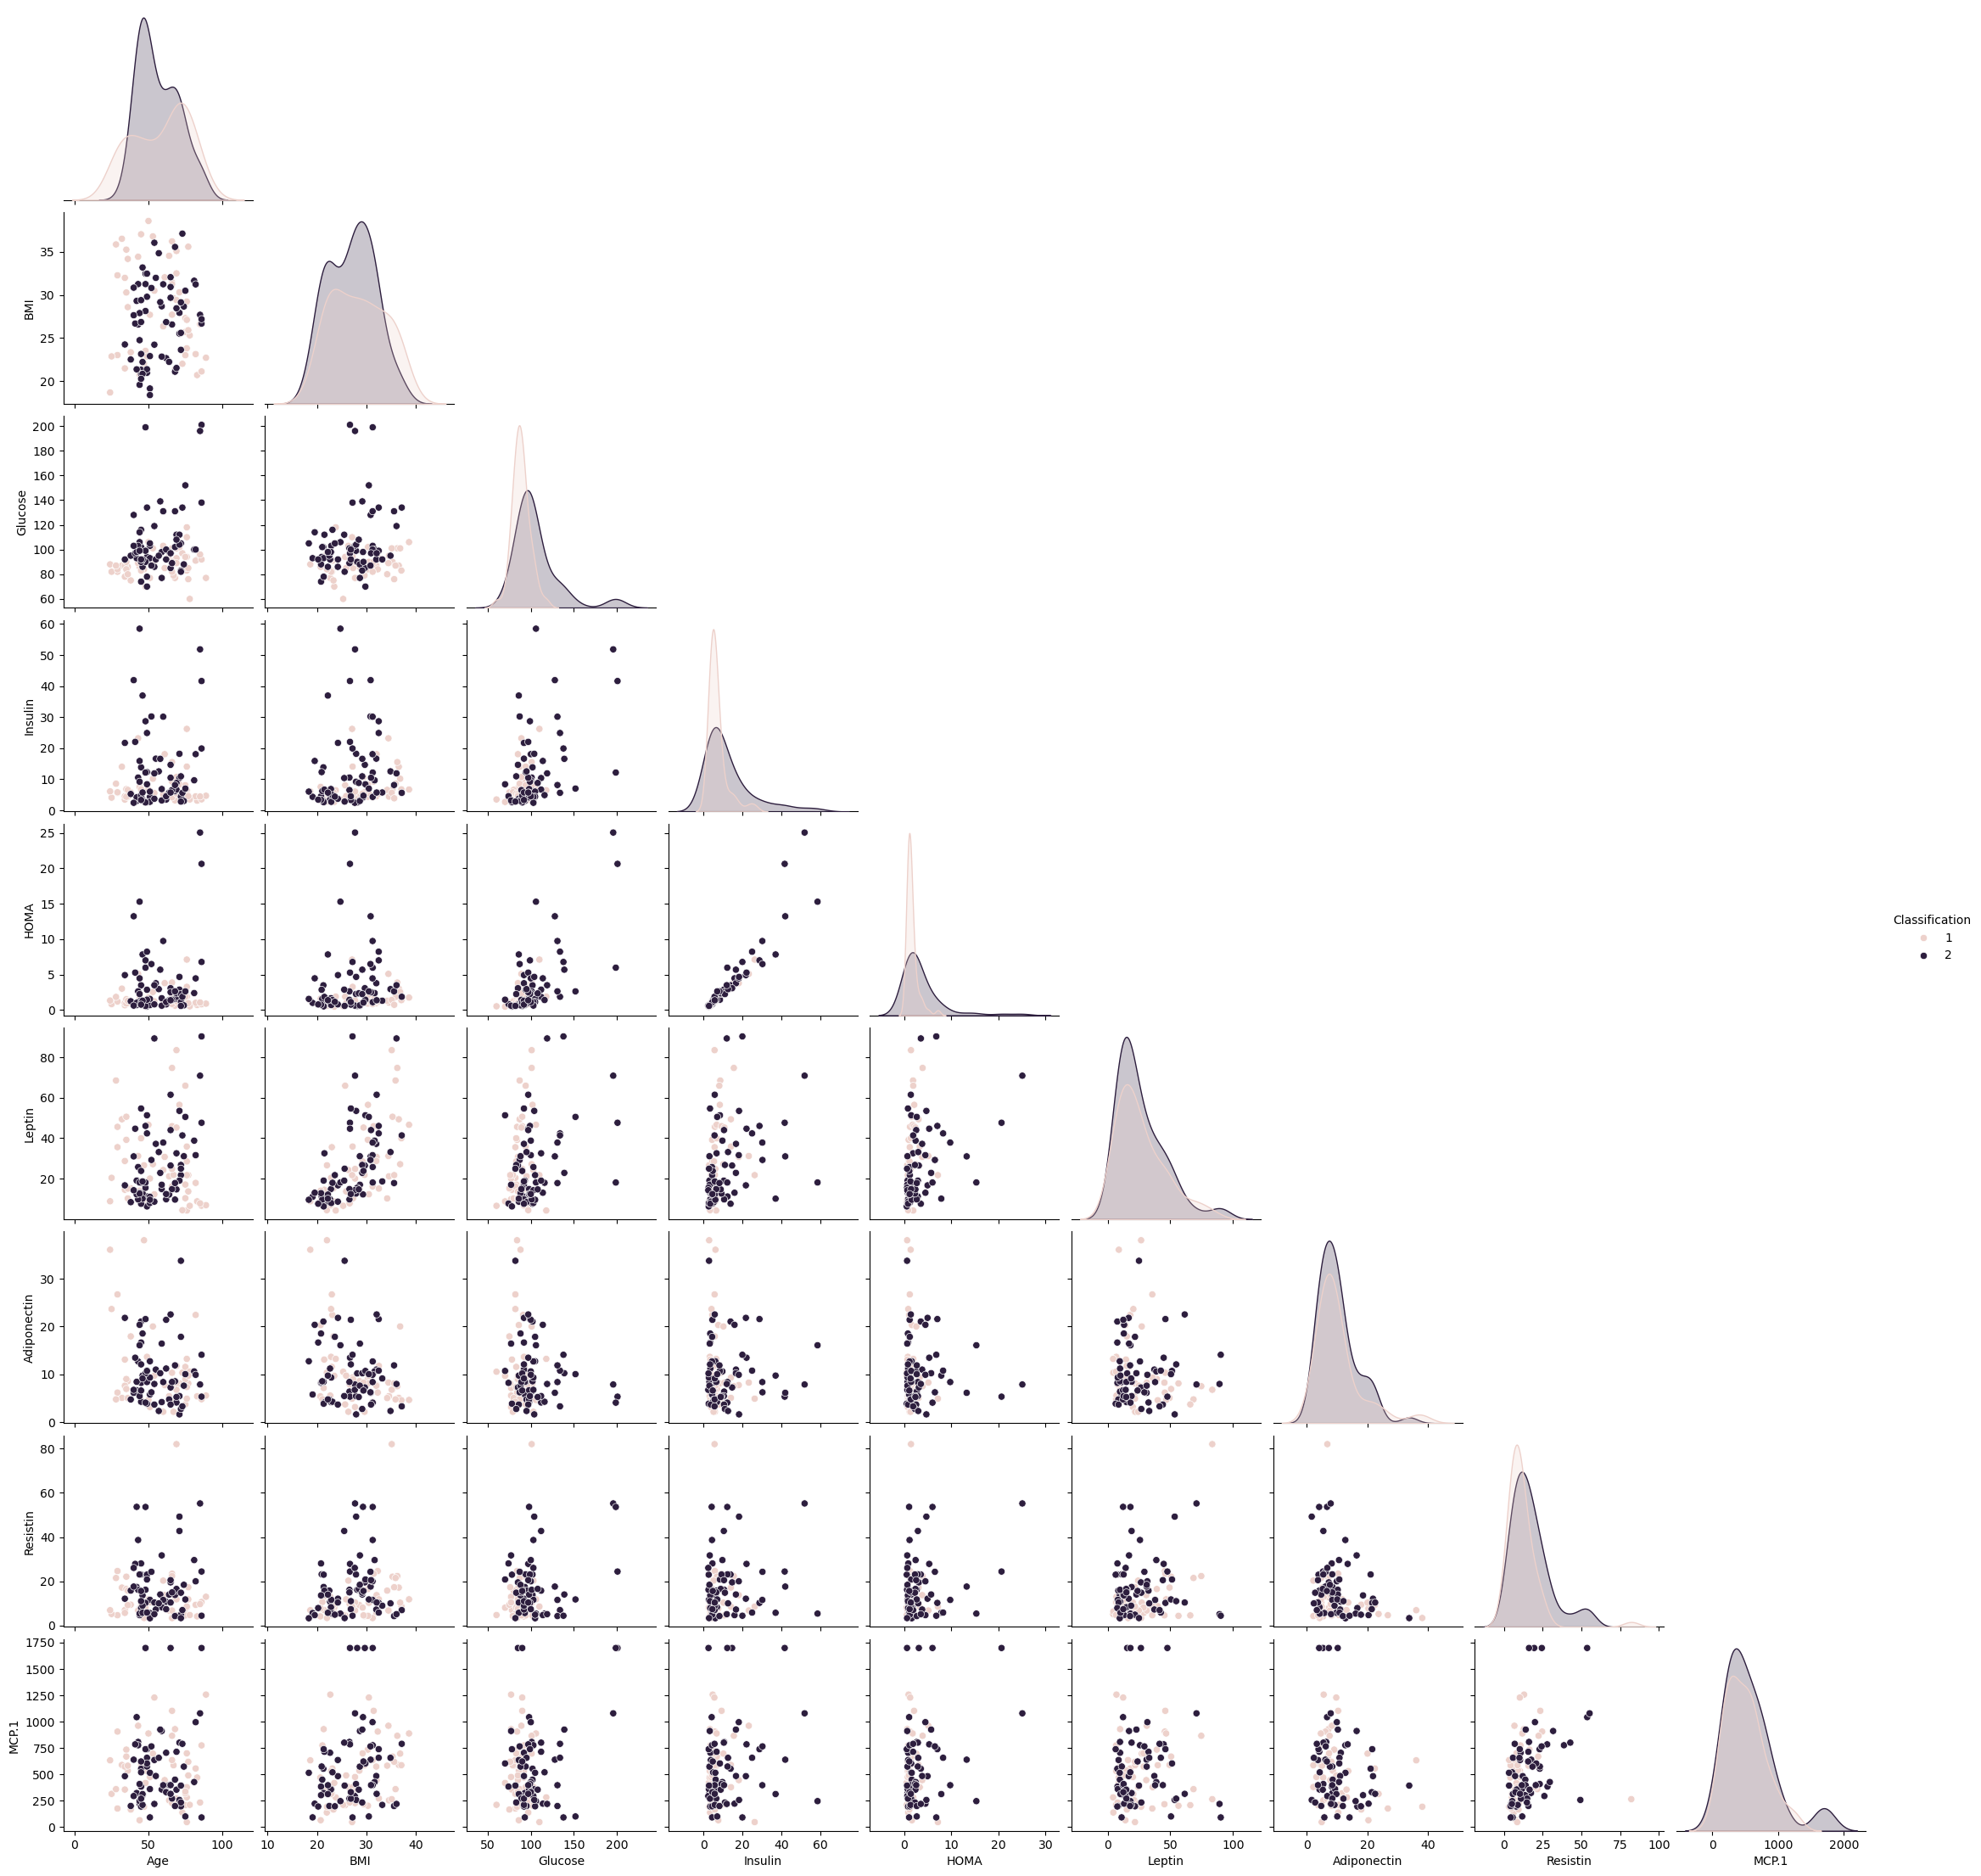

In [40]:
sns.pairplot(
    coimbra, 
    hue='Classification',      # Replace 'Target' with your actual target column name
    diag_kind='kde',   # Shows smooth curves on the diagonal
    corner=True        # Removes the duplicate top-right half of the grid to save space
)

<h1>Data Preperation</h1>

In [44]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [45]:
data.drop(columns=['id', 'Unnamed: 32'], inplace=True)


In [47]:
scaler=StandardScaler()


In [50]:
data['diagnosis']=data['diagnosis'].apply(lambda x:1 if x=="M" else 0)

In [54]:
data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<h3>Preparing data for dso1</h3>

In [57]:
X=data.drop('diagnosis',axis=1)
y=data["diagnosis"]

In [60]:
X_scaled=scaler.fit_transform(X)
scores=X_scaled

In [64]:
X_data=data.drop(columns=['diagnosis'])
y=data['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

<h2>Utiliser PCA pour visualizer les donnes et voir comment les features sont representes dans les 2pc</h2>

In [70]:
pca=PCA()
pca.fit(X_scaled)


PCA()

In [71]:
print(pca.explained_variance_ratio_)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


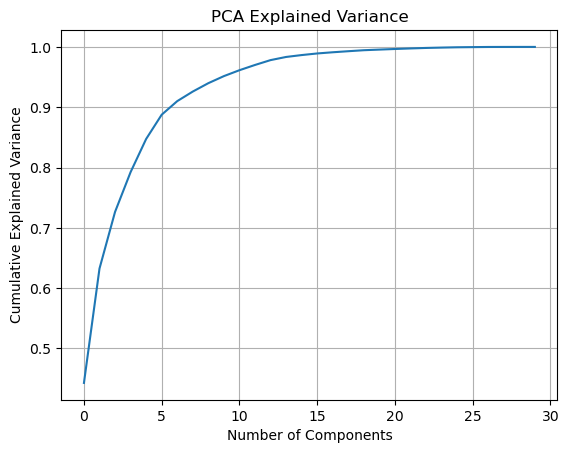

In [72]:
import matplotlib.pyplot as plt

plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


In [73]:
#print(pca.explained_variance_)
print(pca.components_)

[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.75339469e-01]
 [-8.5

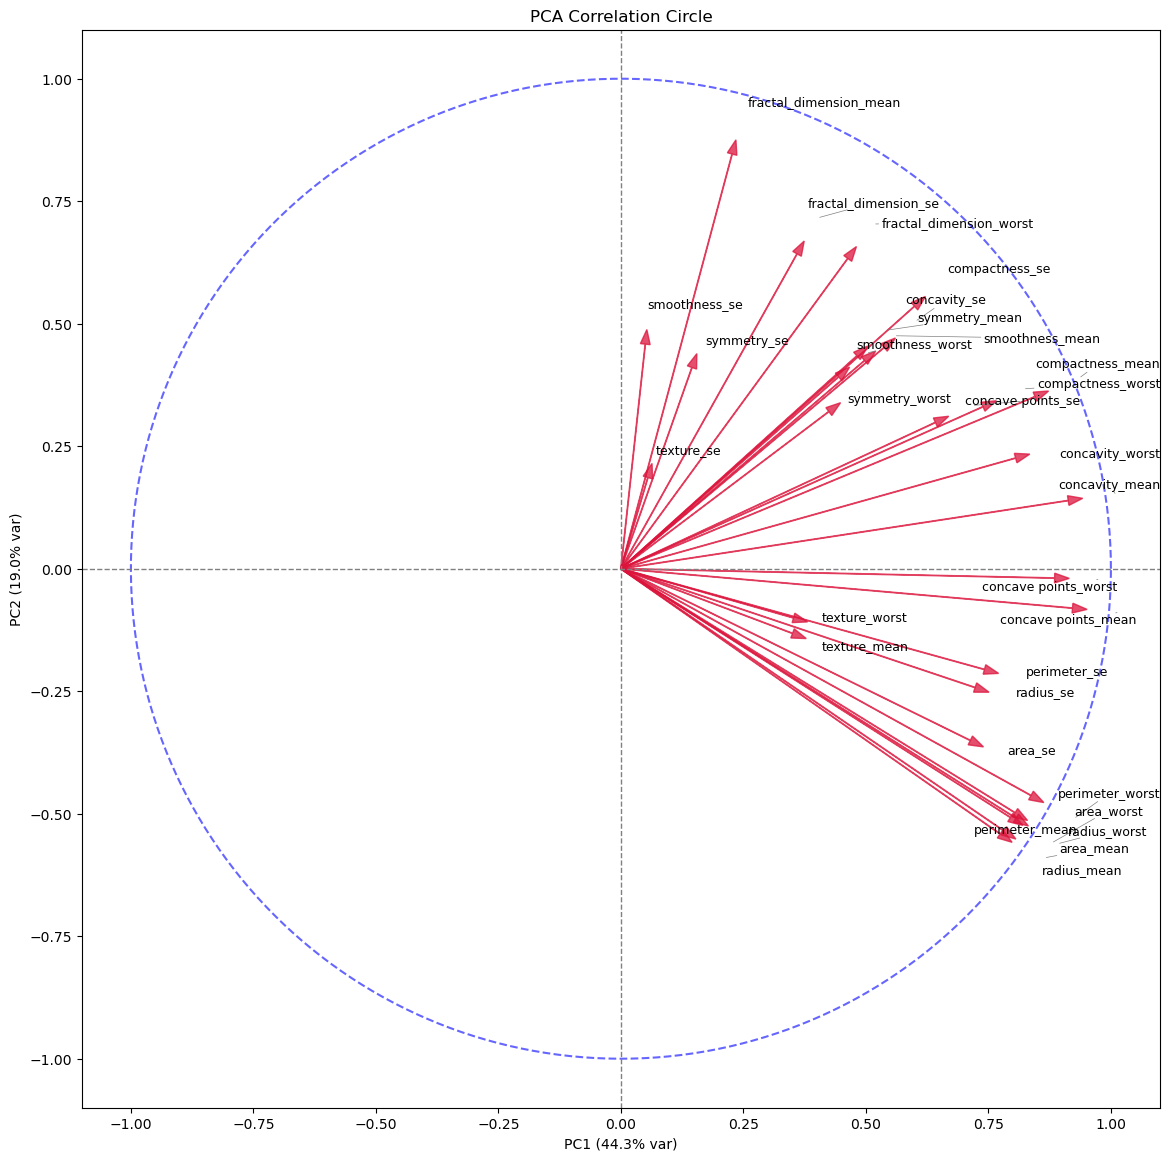

In [74]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np

# 3) Correlation circle coordinates (variable-PC correlations)
eigvals = pca.explained_variance_
loadings_corr = pca.components_.T * np.sqrt(eigvals)  # shape (n_features, 2)

# 4) Plot
fig, ax = plt.subplots(figsize=(14, 14))

# Draw unit circle
theta = np.linspace(0, 2*np.pi, 500)
ax.plot(np.cos(theta), np.sin(theta), 'b--', alpha=0.6)

names = X.columns
texts = []  # <-- important: store the labels here

for i, name in enumerate(names):
    x, y = loadings_corr[i, 0], loadings_corr[i, 1]

    ax.arrow(0, 0, x, y,
             color='crimson',
             alpha=0.75,
             head_width=0.02,
             length_includes_head=True)

    # TEMPORARY label; adjust later
    texts.append(ax.text(x*1.07, y*1.07, name, fontsize=9))

# --- Adjust labels to avoid overlapping ---
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", lw=0.5, color="gray")
)

ax.axhline(0, color='grey', lw=1, ls='--')
ax.axvline(0, color='grey', lw=1, ls='--')

ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
ax.set_title("PCA Correlation Circle")
ax.set_aspect('equal', 'box')

plt.show()


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'diagnosis'],
      dtype='object')
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

        PC8       PC9      PC10  ...      PC22      PC23      PC24      PC25  \
0  2.532475  2.217515  2.255747  ... -1.359293  2.303601  2.001237  1.307686   
1  0.548144  0.001392 -0.868652  ... -0.369203  1.535126  1.890489 -0.375612   
2  2.037231  0

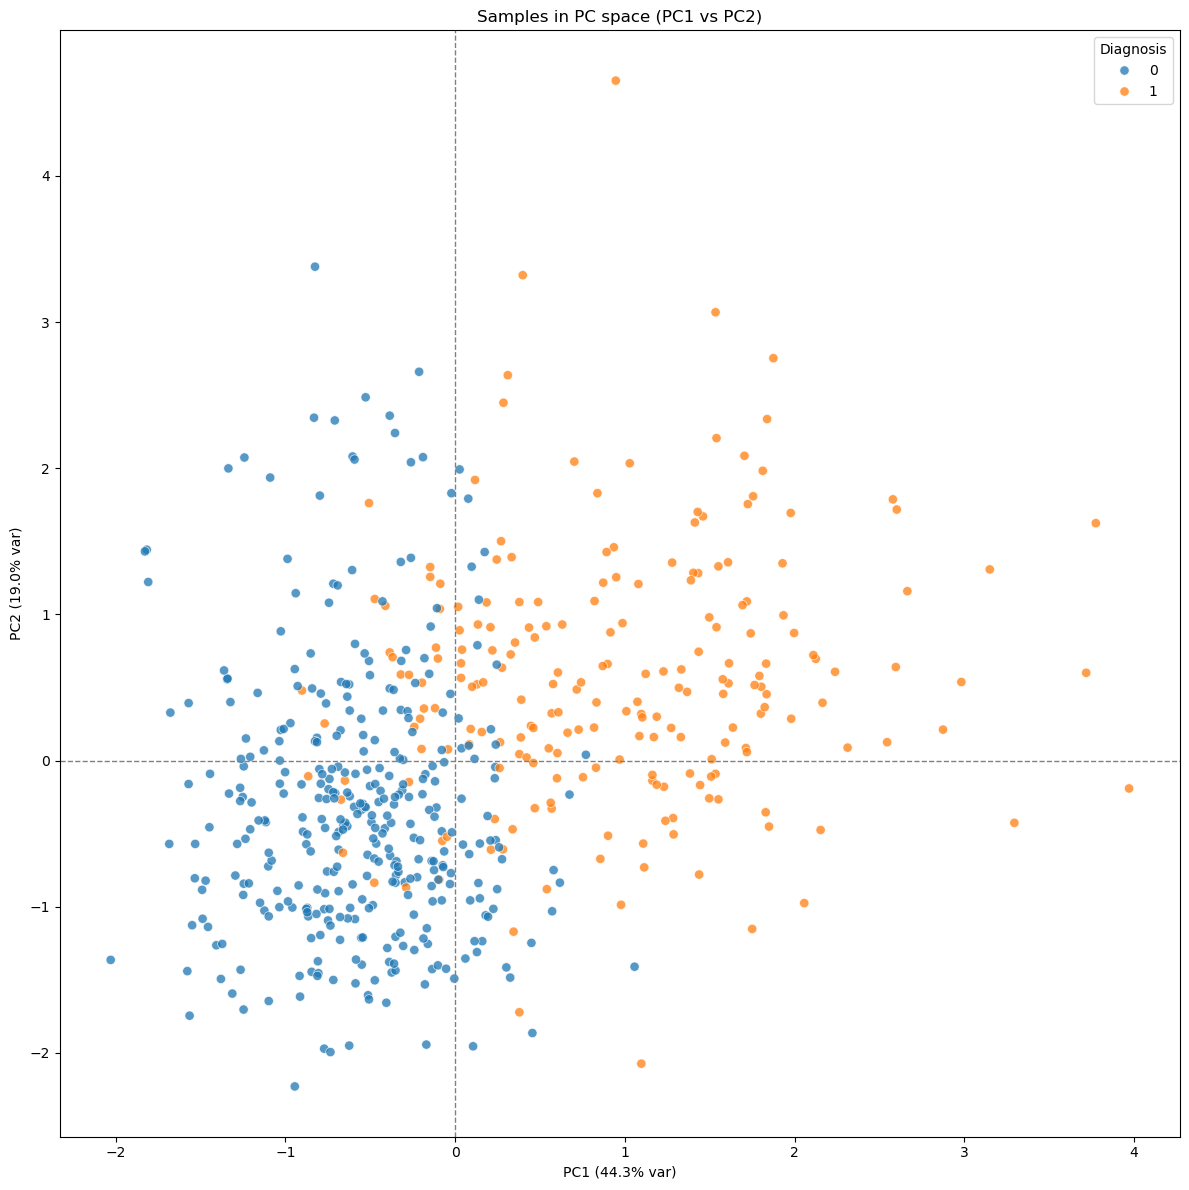

In [75]:
pcs = [f"PC{i}" for i in range(1, scores.shape[1] + 1)]
scores_df = pd.DataFrame(scores, columns=pcs)
scores_df["diagnosis"] = data["diagnosis"]  # ensure the column exists

print(scores_df.columns)        # sanity
print(scores_df.head())

# Plot
plt.figure(figsize=(12,12))
sns.scatterplot(
    data=scores_df, x="PC1", y="PC2",
    hue="diagnosis",
    #palette={"M":"crimson", "B":"steelblue"},
    alpha=0.75, edgecolor="white", s=45
)
plt.axhline(0, color="grey", ls="--", lw=1)
plt.axvline(0, color="grey", ls="--", lw=1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("Samples in PC space (PC1 vs PC2)")
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

In [76]:
coimbra.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [77]:
#X_coimbra=coimbra.drop(columns=['Classification'])
#y_coimbra=coimbra['Classification']
#coimbra_scaled=scaler.fit_transform(X_coimbra)

In [78]:
#pca2=PCA()
#pca2.fit(coimbra_scaled)
#print(pca2.explained_variance_ratio_)
#print(np.cumsum(pca2.explained_variance_ratio_))

<h3>Preparing 2nd dataset for the second dso</h3>

In [80]:
X_coimbra=coimbra.drop(columns=['Classification'])
print(X_coimbra.columns)
X_coimbra=scaler.fit_transform(X_coimbra)

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'],
      dtype='object')


<h3>Preparing Second data for clustering</h3>

In [221]:
cancer_coimbra=coimbra[coimbra['Classification']==2].copy()
cancer_coimbra_1=cancer_coimbra.copy()
cancer_coimbra_2=cancer_coimbra.copy()
y_cancer=coimbra["Classification"]==2
cancer_coimbra.drop(columns=["Classification","Cluster"])
cancer_coimbra=scaler.fit_transform(cancer_coimbra)


In [231]:
cancer_coimbra_2.drop(columns="Cluster",inplace=True)

<h1>Modeling<h1>


<h2>Working on 1st DSO</h2>
<h3>Predict the type of cancer M or B</h3>
<h4>Utiliser XGboost</h4>


In [83]:
xg=xgb.XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xg))

Accuracy: 0.9649122807017544


In [84]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5, 10],
    'min_child_weight': [1, 2, 5, 10]
}

rnd_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,        # number of sampled combinations
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rnd_search_xgb.fit(X_train, y_train)
print("Best Params:", rnd_search_xgb.best_params_)
print(f"Best Cross-Validation Score: {rnd_search_xgb.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best Cross-Validation Score: 0.9902


[19:29:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.



<h2>Utiliser randomForest</h2>

In [86]:
tree=RandomForestClassifier(n_estimators=100,
    max_depth=None,      
    random_state=42,
    n_jobs=-1)
tree.fit(X_train,y_train)

y_pred_rf=tree.predict(X_test)
y_proba_rf = tree.predict_proba(X_test)[:, 1]   # Probability for class 1
print(accuracy_score(y_test,y_pred_rf))

0.9707602339181286


In [87]:
param_grid = {
    'n_estimators': [50, 100, 200,500],        # Number of trees
    'max_depth': [None, 10, 20],           # Max depth of tree (prevents overfitting)
    'min_samples_split': [2, 5],           # Minimum samples required to split a node
    'max_features': ['sqrt', 'log2']       # Number of features to consider at every split
}

tree_optimized=RandomForestClassifier()

grid_search = GridSearchCV(estimator=tree_optimized, param_grid=param_grid,
              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

Starting Grid Search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=2)

<h4>Utiliser MLP avec parametres du search paper</h4>

In [89]:
mlp = MLPClassifier(
    hidden_layer_sizes=(500, 500,500), # hidden layers
    activation='relu',           # Standard activation function
    solver='adam',               # Standard optimizer
    max_iter=3000,               # Train longer to ensure convergence
    learning_rate_init=1e-2,
    batch_size=128,
    random_state=42  # <--- ADD THIS LINE

)

# 5. Train the Model
mlp.fit(X_train, y_train)

# 6. Predict and Evaluate
y_pred_mlp = mlp.predict(X_test)

In [90]:
mlp_optimized= MLPClassifier(
    hidden_layer_sizes=(100, 50), # hidden layers
    activation='relu',           # Standard activation function
    solver='adam',               # Standard optimizer
    max_iter=3000,               # Train longer to ensure convergence
    learning_rate_init=1e-2,
    batch_size=128,
    random_state=42  # <--- ADD THIS LINE

)

# 5. Train the Model
mlp_optimized.fit(X_train, y_train)

# 6. Predict and Evaluate
y_pred_mlpOpt = mlp_optimized.predict(X_test)

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid_mlp = {
    'hidden_layer_sizes': [
        (30,),          # Simple
        (64, 32),       # Funnel
        (100, 50, 25)   # Deeper Funnel
    ],
    'alpha': [0.0001, 0.01],
    'solver': ['lbfgs', 'adam']
}

grid_mlp = GridSearchCV(MLPClassifier(max_iter=2000, random_state=42), param_grid_mlp, cv=5, scoring='recall')
grid_mlp.fit(X_train, y_train)

print("Winner:", grid_mlp.best_params_)

lbfgs failed to converge after 1 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge after 1 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge after 1 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge after 1 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge after 1 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge after 1 iteration(s) (status=2):
ABNORMAL: 

You might 

Winner: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 25), 'solver': 'lbfgs'}


In [92]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# 2. The "Robust" Winner Configuration
mlp_final = MLPClassifier(
    # The architecture found by GridSearch
    hidden_layer_sizes=(100, 50, 25), 
    
    # Solver settings
    solver='lbfgs',
    activation='relu',
    alpha=0.01,            # Higher alpha helps smooth the math landscape
    
    # CRITICAL FIXES FOR CONVERGENCE:
    max_iter=10000,        # Give it much more time (was 2000 or 3000)
    tol=1e-4,              # Stop when improvement is small (standard tolerance)
    
    random_state=42
)

# 3. Train (Should run silently now)
mlp_final.fit(X_train, y_train)

y_pred_mlp_final = mlp_optimized.predict(X_test)
# 4. Evaluate
print("Training finished successfully.")
print("Test Accuracy:", mlp_final.score(X_test, y_test))
print(classification_report(y_test, y_pred_mlp_final))

Training finished successfully.
Test Accuracy: 0.9532163742690059
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       108
           1       1.00      0.87      0.93        63

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



In [93]:
# Only use this if lbfgs keeps crashing
mlp_fallback = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25), 
    solver='adam',          # The "Jeep" of solvers (goes anywhere)
    learning_rate_init=0.001,
    max_iter=2000,
    alpha=0.01,
    random_state=42
)
mlp_fallback.fit(X_train, y_train)
y_pred_mlp_fallback = mlp_optimized.predict(X_test)
# 4. Evaluate
print("Training finished successfully.")
print("Test Accuracy:", mlp_final.score(X_test, y_test))
print(classification_report(y_test, y_pred_mlp_fallback))

Training finished successfully.
Test Accuracy: 0.9532163742690059
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       108
           1       1.00      0.87      0.93        63

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



<h3>Working on DSO2</h3>
<h3>Cluster diagnosis patterns</h3>

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Cluster'],
      dtype='object')


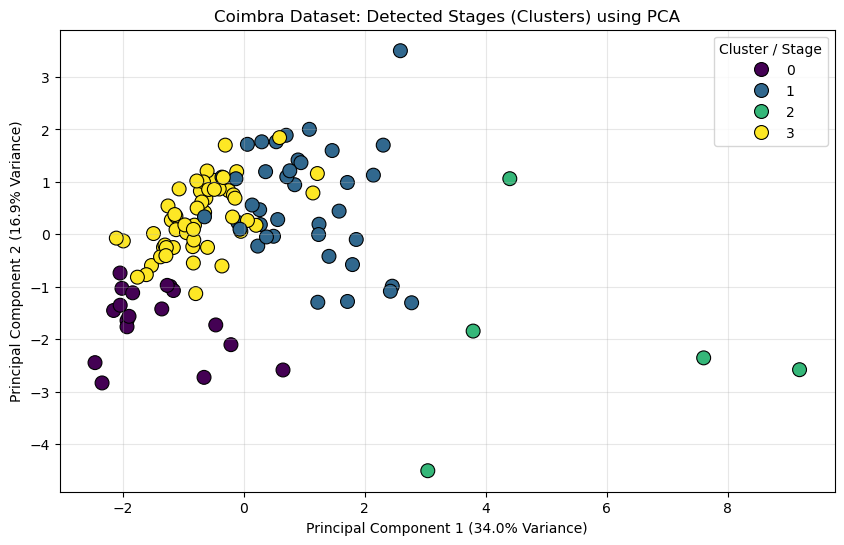

In [252]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=42,n_init=10)
kmeans_labels=kmeans.fit_predict(X_coimbra)
#coimbra['Cluster']=kmeans_labels

features=coimbra.drop(columns=["Classification"]).columns
print(features)
pca2=PCA(n_components=2)
X_pca2=pca2.fit_transform(X_coimbra)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca2[:, 0], 
    y=X_pca2[:, 1], 
    hue=kmeans_labels, 
    palette='viridis', 
    s=100,
    edgecolor='black'
)
plt.title('Coimbra Dataset: Detected Stages (Clusters) using PCA')
plt.xlabel(f'Principal Component 1 ({pca2.explained_variance_ratio_[0]:.1%} Variance)')
plt.ylabel(f'Principal Component 2 ({pca2.explained_variance_ratio_[1]:.1%} Variance)')
plt.legend(title='Cluster / Stage')
plt.grid(True, alpha=0.3)
plt.show()



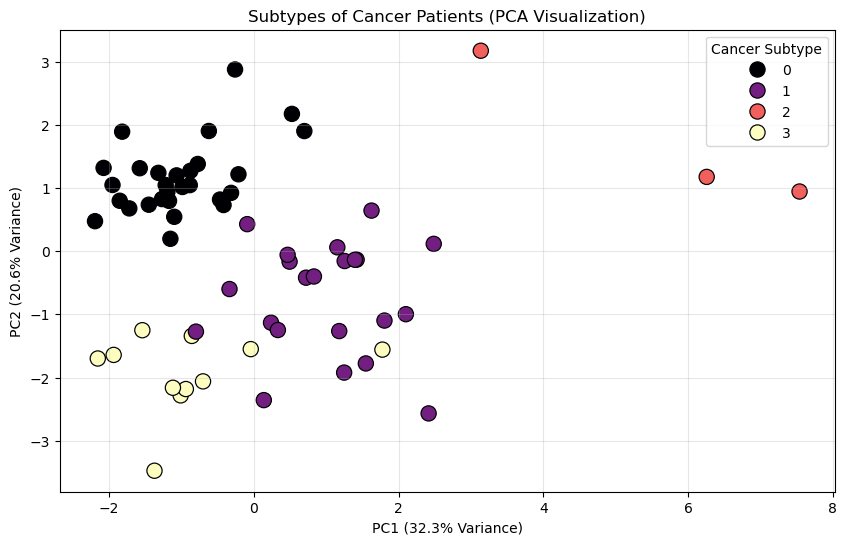

In [250]:
kmeans_cancer = KMeans(n_clusters=4, random_state=42, n_init=10)
subtype_labels = kmeans_cancer.fit_predict(cancer_coimbra)

# Add the new labels to our subset dataframe
cancer_coimbra_2['Cancer_Subtype'] = subtype_labels

# 5. Apply PCA to Visualize the Subtypes
# ---------------------------------------------------------
pca_cancer = PCA(n_components=2)
X_pca_cancer = pca_cancer.fit_transform(cancer_coimbra)

# 6. Plot the Scatter Plot
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca_cancer[:, 0], 
    y=X_pca_cancer[:, 1], 
    hue=subtype_labels, 
    palette='magma',  # Different palette to distinguish from previous plot
    s=120,
    edgecolor='black'
)
plt.title('Subtypes of Cancer Patients (PCA Visualization)')
plt.xlabel(f'PC1 ({pca_cancer.explained_variance_ratio_[0]:.1%} Variance)')
plt.ylabel(f'PC2 ({pca_cancer.explained_variance_ratio_[1]:.1%} Variance)')
plt.legend(title='Cancer Subtype')
plt.grid(True, alpha=0.3)
plt.show()


In [96]:
coimbra

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  
2     9.27715  554.697               1  
3    12.76600  928.220               1  
4    10.57635  773.920               1  
..        ...      ...             ...  
111  10.96000  268.230               2  
112   7.32000  330.160               2  
113  10.33000  314.050               2  
114   3.27000  392.460               2  
115   4.35000   90.090               2  

[116 rows x 10 columns]

<h1>Evaluation<h1></h1>


<h3>Evaluating clusters for detecting cancer</h3>

Cluster	Name	Defining Characteristics	Clinical Implication
2	Metabolic-Inflammatory	High Glucose, Insulin, Resistin, Age	Likely aggressive; treat insulin resistance.
1	Obesity-Driven	High BMI, High Leptin	Driven by excess fat tissue.
3	Adiponectin-High	Very High Adiponectin, Young, Thin	"Healthy" profile; likely genetic cause.
0	Low-Risk Profile	Low Insulin, Low Leptin	Mild metabolic profile.

--- Average Biomarker Levels per Cancer Subtype ---
                      Age        BMI     Glucose    Insulin       HOMA  \
Cancer_Subtype                                                           
0               54.642857  25.193643   94.607143   6.047250   1.424315   
1               59.863636  31.292252  110.863636  16.110682   4.474795   
2               73.000000  28.535148  198.666667  35.195667  17.216999   
3               51.000000  22.506034   97.454545  15.591000   3.810597   

                   Leptin  Adiponectin   Resistin        MCP.1  Classification  
Cancer_Subtype                                                                  
0               15.542550     6.952141  18.571253   583.931964             2.0  
1               44.327805    10.080522  16.377320   521.300864             2.0  
2               45.553600     5.787642  44.405400  1491.746333             2.0  
3               14.101173    19.101852   8.248129   339.918455             2.0  


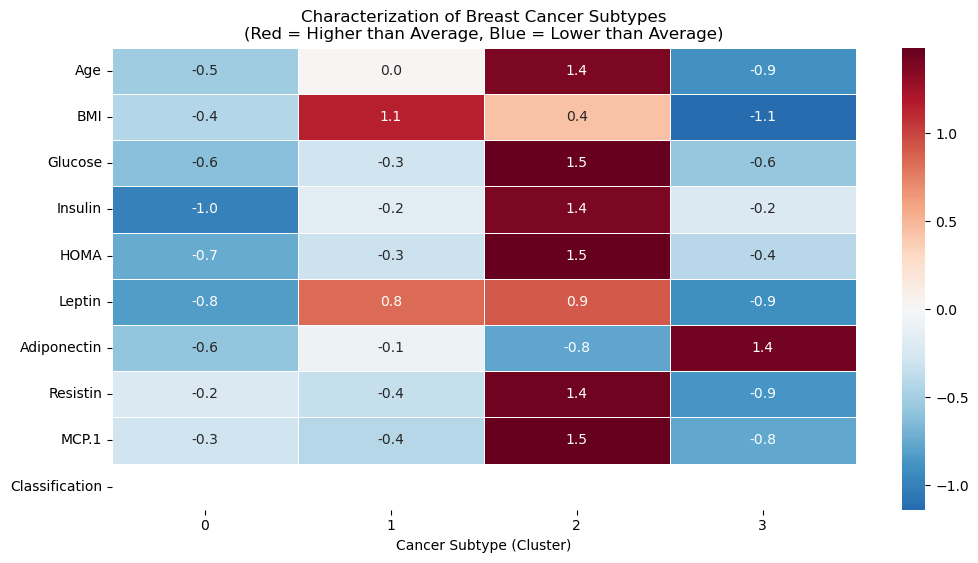

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the Mean (Average) for each Cluster
# ---------------------------------------------------------
# We assume 'cancer_df' has your cancer patients and a 'Subtype' column
# If you used 'Cluster' in the previous step, change 'Subtype' to 'Cluster'
cluster_means = cancer_coimbra_2.groupby('Cancer_Subtype').mean()

# Print the raw numbers (useful to see real units like mg/dL)
print("--- Average Biomarker Levels per Cancer Subtype ---")
print(cluster_means)

# 2. Visualize with a Heatmap (Standardized)
# ---------------------------------------------------------
# We standardize the data just for the plot so that 'MCP.1' (range 0-2000) 
# doesn't overshadow 'Insulin' (range 0-50).
# Formula: (Value - Average) / Standard Deviation
heatmap_data = (cluster_means - cluster_means.mean()) / cluster_means.std()

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data.T,     # Transpose so Features are rows, Clusters are columns
    cmap='RdBu_r',      # Red = High, Blue = Low
    center=0,           # White = Average
    annot=True,         # Show the standardized score
    fmt=".1f",
    linewidths=.5
)
plt.title('Characterization of Breast Cancer Subtypes\n(Red = Higher than Average, Blue = Lower than Average)')
plt.xlabel('Cancer Subtype (Cluster)')
plt.show()

In [98]:
# Create a crosstab table
# 1 = Healthy Controls
# 2 = Breast Cancer Patients
coimbra['Cluster']=kmeans_labels
relation_table = pd.crosstab(coimbra['Cluster'], coimbra['Classification'])

# Rename columns for clarity
relation_table.columns = ['Healthy (1)', 'Patients (2)']
print("--- Cluster vs Cancer Relationship ---")
print(relation_table)

# Calculate percentages to see the "Risk" of each cluster
relation_table['Cancer Rate'] = relation_table['Patients (2)'] / (relation_table['Healthy (1)'] + relation_table['Patients (2)'])
print("\n--- Cancer Probability per Cluster ---")
print(relation_table)

--- Cluster vs Cancer Relationship ---
         Healthy (1)  Patients (2)
Cluster                           
0                  8            10
1                 18            21
2                  0             5
3                 26            28

--- Cancer Probability per Cluster ---
         Healthy (1)  Patients (2)  Cancer Rate
Cluster                                        
0                  8            10     0.555556
1                 18            21     0.538462
2                  0             5     1.000000
3                 26            28     0.518519


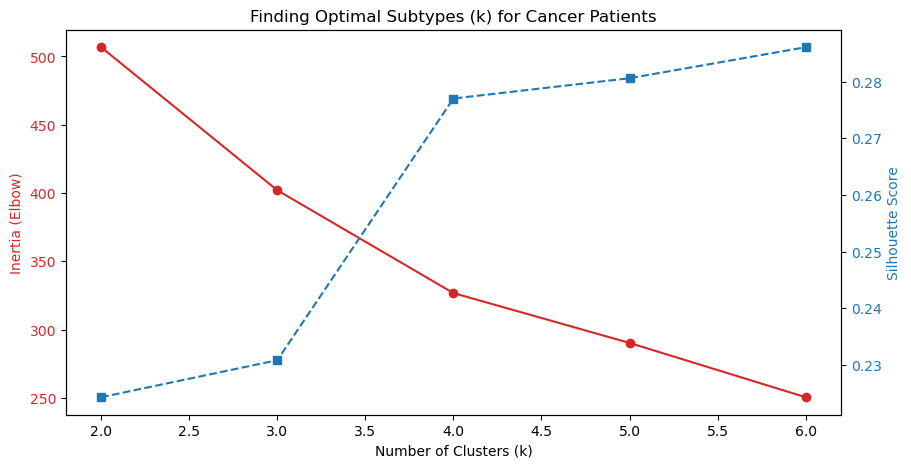

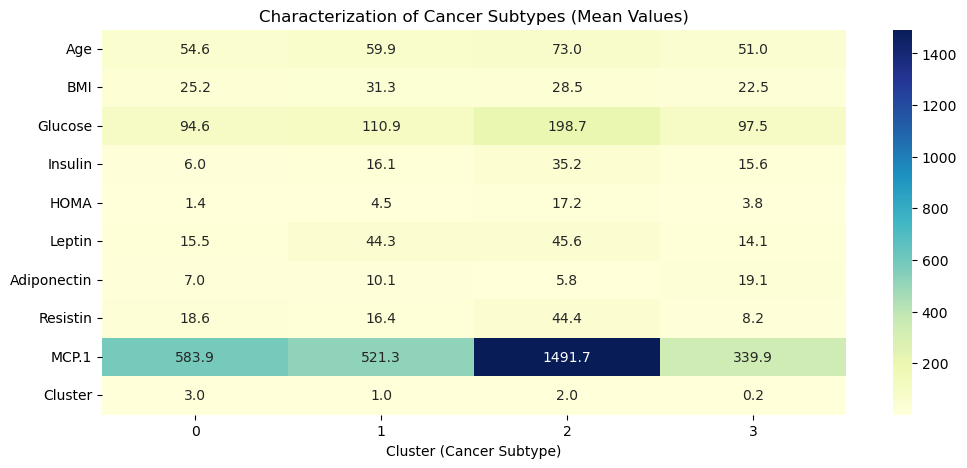

In [261]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K_range = range(2, 7) # Checking 2 to 6 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(cancer_coimbra)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cancer_coimbra, labels))

# Plot Elbow and Silhouette
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Elbow)', color=color)
ax1.plot(K_range, inertia, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, silhouette_scores, color=color, marker='s', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Finding Optimal Subtypes (k) for Cancer Patients')
plt.show()

# 5. Apply Final Clustering (Let's assume k=3 based on typical results)
# ---------------------------------------------------------
best_k = 4
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cancer_labels = final_kmeans.fit_predict(cancer_coimbra)

# Add labels back to the Cancer Dataframe
cancer_coimbra_1['Subtype'] = cancer_labels

# 6. Characterize the Subtypes
# ---------------------------------------------------------
# We group by the new 'Subtype' to see the average biomarkers for each
subtype_profile = cancer_coimbra_1.drop('Classification', axis=1).groupby('Subtype').mean()

# Visualization: Heatmap of the profiles
plt.figure(figsize=(12, 5))
# Normalize the heatmap rows so we can compare high/low easily
sns.heatmap(subtype_profile.T, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title(f'Characterization of Cancer Subtypes (Mean Values)')
plt.xlabel('Cluster (Cancer Subtype)')
plt.show()

<h2>Evaluating models made for dso1</h2>

In [99]:
#print("TRAIN Accuracy:", accuracy_score(y_train, y_pred_mlp))
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlpOpt):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_mlpOpt))

Accuracy: 0.9532

Classification Report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       108
           1       1.00      0.87      0.93        63

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



In [100]:
#print("TRAIN Accuracy:", accuracy_score(y_train, y_pred_mlp))
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_mlp))

Accuracy: 0.9357

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       108
           1       0.86      0.98      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.93       171
weighted avg       0.94      0.94      0.94       171



<h3>resultat grid search sur random forest</h3>

In [104]:
print("\n--- RESULTS ---")
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.7f}")


--- RESULTS ---
Best Parameters Found: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9648
Test Set Accuracy: 0.9707602


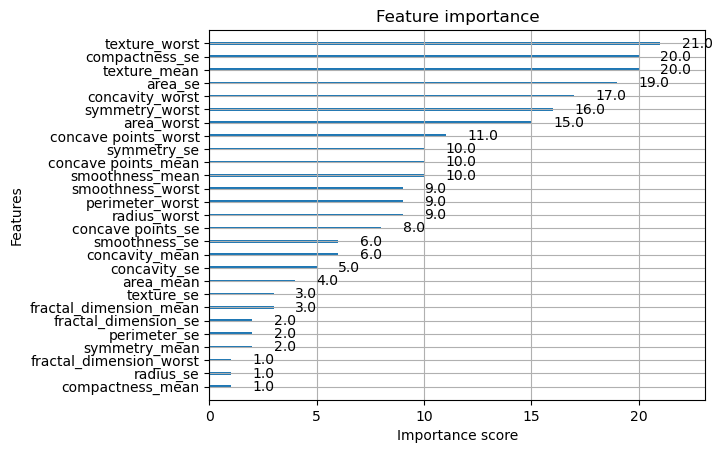

In [105]:
xgb.plot_importance(xg)
plt.show()

<h3>XGboost result</h3>

Accuracy: 0.9649122807017544

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



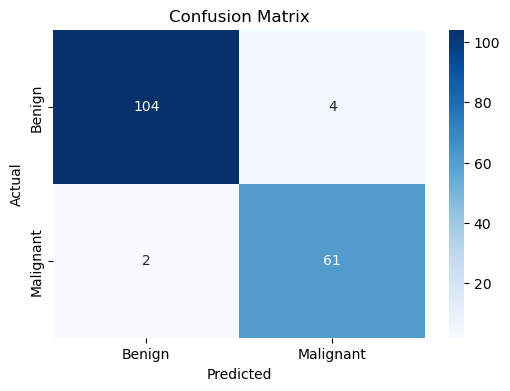

In [107]:
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("\nClassification report:\n", classification_report(y_test, y_pred_xg))
cm=confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h3>Random Forest result</h3>

Accuracy: 0.9707602339181286

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



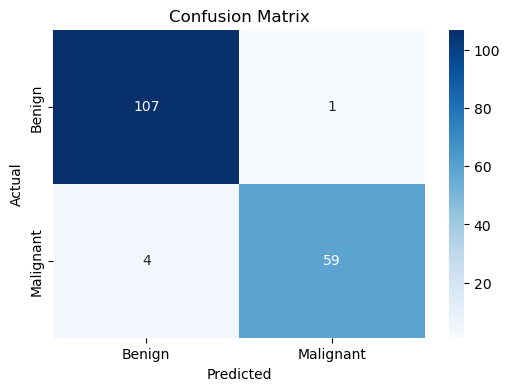

In [109]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))
cm=confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [110]:
importance = tree.feature_importances_
for name, value in zip(X.columns, importance):
    print(f"{name}: {value}")

radius_mean: 0.032311888273301004
texture_mean: 0.011063901250175845
perimeter_mean: 0.060092333477412795
area_mean: 0.05381045367561502
smoothness_mean: 0.006223358550035776
compactness_mean: 0.009215659698391042
concavity_mean: 0.08055701642634591
concave points_mean: 0.1419344436315119
symmetry_mean: 0.003278068988046974
fractal_dimension_mean: 0.003140276443878005
radius_se: 0.016434957577357797
texture_se: 0.003171913625550393
perimeter_se: 0.011769755537440448
area_se: 0.029538418256883636
smoothness_se: 0.005880791914760226
compactness_se: 0.004596378662668866
concavity_se: 0.005815899489496524
concave points_se: 0.0033823220710919844
symmetry_se: 0.0040007728493448805
fractal_dimension_se: 0.007134569189458313
radius_worst: 0.07797474929691814
texture_worst: 0.018785671163890155
perimeter_worst: 0.07429212194132524
area_worst: 0.11821685833472201
smoothness_worst: 0.011769174205977244
compactness_worst: 0.017539085585610643
concavity_worst: 0.04107957505964944
concave points_wo

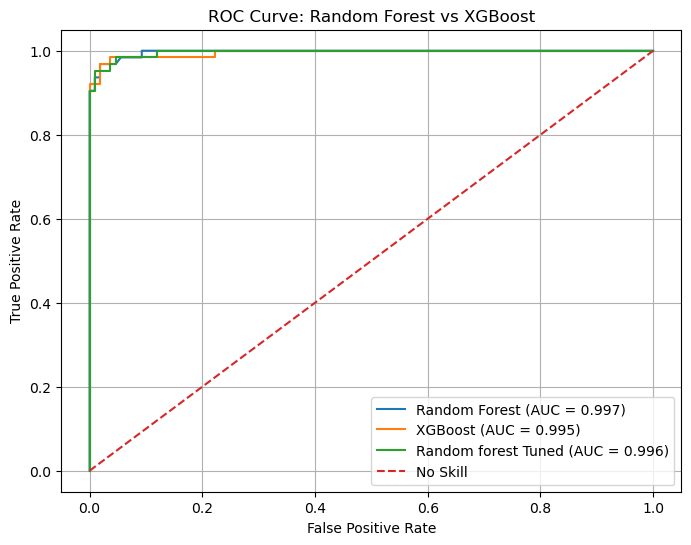

In [111]:


# ---- RANDOM FOREST ----
y_proba_rf = tree.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# ---- XGBOOST ----
y_proba_xgb = xg.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)
#--------------tuned Random Forest------------------
y_proba_tuned_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned_rf)
auc_tuned = auc(fpr_tuned, tpr_tuned)

# ---- PLOT ----
plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.3f})")
plt.plot(fpr_tuned, tpr_tuned, label=f"Random forest Tuned (AUC = {auc_tuned:.3f})")


# Chance line
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Random Forest vs XGBoost")
plt.legend()
plt.grid()
plt.show()


In [112]:
explainer=shap.TreeExplainer(tree)
shap_values=explainer.shap_values(X_test)
# Exemple : première observation du test
shap.initjs()  # Pour activer les graphiques interactifs
shap.force_plot(explainer.expected_value[1], shap_values[1][30], X_test.iloc[30].values, feature_names=X_test.columns)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


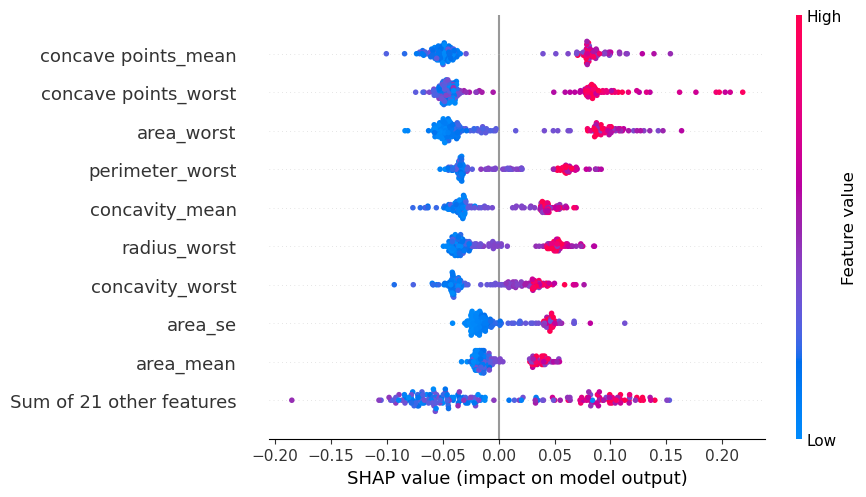

In [113]:
shap_values=explainer(X_test)
shap.plots.beeswarm(shap_values[:,:,1])

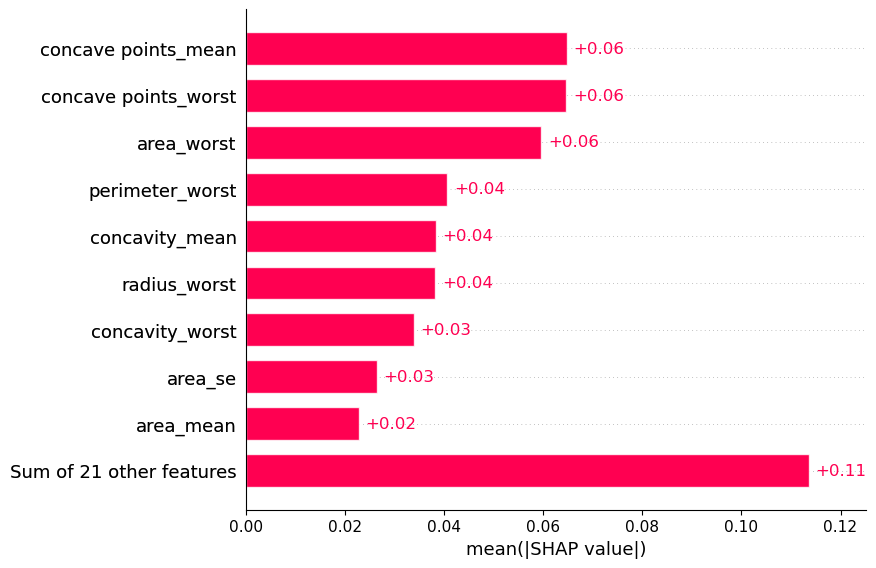

In [114]:
import shap

# 1. Create the explainer
explainer = shap.TreeExplainer(tree)

# 2. CRITICAL: Call the explainer directly (do NOT use .shap_values)
# This ensures you get the 'Explanation' object with feature names included
explanation_object = explainer(X_test)

# 3. Handle the slicing safely
# If it's 3D (Rows, Features, Classes), we slice out Class 1
if len(explanation_object.shape) == 3:
    shap_values_to_plot = explanation_object[:, :, 1]
else:
    shap_values_to_plot = explanation_object

# 4. Now the bar plot will definitely work
shap.plots.bar(shap_values_to_plot)

<h1>Deployment</h1>